In [1]:
%load_ext autoreload
%autoreload 2

# KIAM 8

## Task 2 - Model Building and Training


Objective: Build, train, and evaluate classification models to detect fraudulent transactions, using appropriate techniques for imbalanced data.

### Pahse 1 : Without Class Imbalance Handling

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, roc_curve,
                             precision_recall_curve, accuracy_score,
                                precision_score, recall_score, f1_score)
from sklearn.model_selection import train_test_split
import importlib

In [3]:
# Import Data

df_credit_card = pd.read_csv('../data/processed/creditcard_cleaned.csv')
df_Fraud_data = pd.read_csv('../data/processed/Fraud_Data_Enriched.csv')

In [4]:
df_Fraud_data.columns

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class',
       'Country'],
      dtype='object')

In [5]:
df_credit_card.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
# Examine the DataFrames

# Credit Card DataFrame

print("Credit Card DataFrame Info:")
print(df_credit_card.info())
print("\nFirst 5 rows of Credit Card DataFrame:")
print(df_credit_card.head())

Credit Card DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283726 entries, 0 to 283725
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-n

In [7]:
# Examine the DataFrames

# Fraud Data DataFrame

print("Fraud Data DataFrame Info:")
print(df_Fraud_data.info())
print("\nFirst 5 rows of Fraud Data DataFrame:")
print(df_Fraud_data.head())

Fraud Data DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
 11  Country         151112 non-null  object 
dtypes: float64(1), int64(4), object(7)
memory usage: 13.8+ MB
None

First 5 rows of Fraud Data DataFrame:
   user_id          signup_time        purchase_time  purchase_value  \
0    22058  2015-02-24 22:55:49  2015-0

### 1.  Data Preparation

In [8]:
# Add Scripts Folder to Path
import sys
import os

cwd = os.getcwd()
scripts_path = os.path.join(cwd,'..', 'scripts')
scripts_abs_path = os.path.abspath(scripts_path)
if scripts_abs_path not in sys.path and os.path.isdir(scripts_abs_path):
    sys.path.append(scripts_abs_path)
    print(f"Added scripts folder to path")
else:
    print(f"Scripts folder already in path or does not exist")

Added scripts folder to path


In [9]:
# Import processing and modeling modules

import modeling as md
import data_processing as dp

In [10]:
# Reload the modules

importlib.reload(dp)

<module 'data_processing' from 'c:\\Users\\henokt\\OneDrive - Inchcape\\Documents\\GitHub\\Improved-Fraud_Detection\\scripts\\data_processing.py'>

In [11]:
df_credit_card.columns = df_credit_card.columns.str.lower()

In [12]:
# Feature Preparation

X_CreditCard,y_CreditCard,CreditCard_Features,CreditCard_Encoders  = dp.prepare_features(df_credit_card)

X_fraudData,y_fraudData,FraudData_Features,FraudData_Encoders  = dp.prepare_features(df_Fraud_data)


FEATURE PREPARATION
Initial features: 30
Categorical features: 0
Numerical features: 30

Final feature matrix shape: (283726, 30)
Target distribution:
0    283253
1       473
Name: count, dtype: int64

FEATURE PREPARATION
Initial features: 6
Categorical features: 4
Numerical features: 2

Encoding categorical features: ['source', 'browser', 'sex', 'Country']

Final feature matrix shape: (151112, 190)
Target distribution:
0    136961
1     14151
Name: count, dtype: int64


In [13]:
# Split Data into Train and Test Sets

X_train_creditCard, X_test_creditCard, y_train_creditCard, y_test_creditCard = train_test_split(X_CreditCard, y_CreditCard, test_size=0.2, random_state=42, stratify=y_CreditCard)
X_train_fraudData, X_test_fraudData, y_train_fraudData, y_test_fraudData = train_test_split(X_fraudData, y_fraudData, test_size=0.2, random_state=42, stratify=y_fraudData)

### 2. Build Baseline Model

In [14]:

# Train model on Credit Card dataset
model_creditCard = md.train_logistic_regression(X_train_creditCard, y_train_creditCard)


TRAINING LOGISTIC REGRESSION
Model parameters: {'C': 1.0, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': -1, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Training...
✓ Training complete!


In [15]:
# Train model on Fraud Data dataset
model_fraudData = md.train_logistic_regression(X_train_fraudData, y_train_fraudData)


TRAINING LOGISTIC REGRESSION
Model parameters: {'C': 1.0, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': -1, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Training...
✓ Training complete!


In [16]:
# Evaluate Models

# Evaluate Credit Card Model
Credit_card_Model_metircs, Credit_card_Model_y_pred,Credit_card_Model_y_proba = md.evaluate_model(model_creditCard,X_test_creditCard, y_test_creditCard, model_name="Credit Card Logistic Regression")


EVALUATING CREDIT CARD LOGISTIC REGRESSION

Performance Metrics:
  Accuracy:  0.9675
  Precision: 0.0433
  Recall:    0.8737
  F1-Score:  0.0826
  ROC-AUC:   0.9567
  PR-AUC:    0.6643

Confusion Matrix:
  True Negatives:  54819
  False Positives: 1832
  False Negatives: 12
  True Positives:  83

Classification Report:
              precision    recall  f1-score   support

  Legitimate       1.00      0.97      0.98     56651
       Fraud       0.04      0.87      0.08        95

    accuracy                           0.97     56746
   macro avg       0.52      0.92      0.53     56746
weighted avg       1.00      0.97      0.98     56746



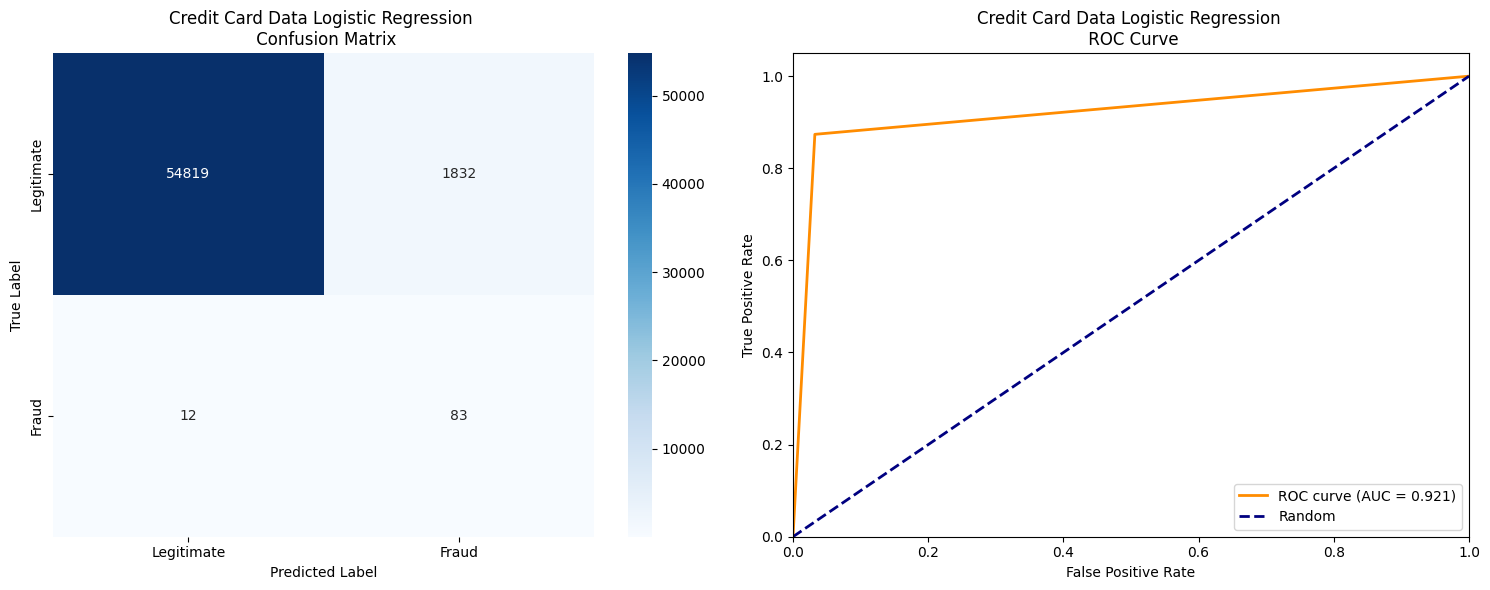

In [17]:
# Visualize Credit Card Model Performance

# 1. Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 6)) 

# 2. Plot the Confusion Matrix on the first axis (axes[0])
md.plot_confusion_matrix(y_test_creditCard,Credit_card_Model_y_pred,ax=axes[0]);
axes[0].set_title("Credit Card Data Logistic Regression \n Confusion Matrix")

# 3. Plot the ROC Curve on the second axis (axes[1])
md.plot_roc_curve(y_test_creditCard,Credit_card_Model_y_pred,ax=axes[1]);
axes[1].set_title("Credit Card Data Logistic Regression \n ROC Curve")

plt.tight_layout()
plt.show()

In [18]:
# Evaluate Fraud Data Model

Fraud_data_Model_metircs, Fraud_data_Model_y_pred,Fraud_data_Model_y_proba = md.evaluate_model(model_fraudData,X_test_fraudData, y_test_fraudData, model_name="Fraud Data Logistic Regression")


EVALUATING FRAUD DATA LOGISTIC REGRESSION

Performance Metrics:
  Accuracy:  0.5716
  Precision: 0.1079
  Recall:    0.4919
  F1-Score:  0.1770
  ROC-AUC:   0.5522
  PR-AUC:    0.1195

Confusion Matrix:
  True Negatives:  15884
  False Positives: 11509
  False Negatives: 1438
  True Positives:  1392

Classification Report:
              precision    recall  f1-score   support

  Legitimate       0.92      0.58      0.71     27393
       Fraud       0.11      0.49      0.18      2830

    accuracy                           0.57     30223
   macro avg       0.51      0.54      0.44     30223
weighted avg       0.84      0.57      0.66     30223



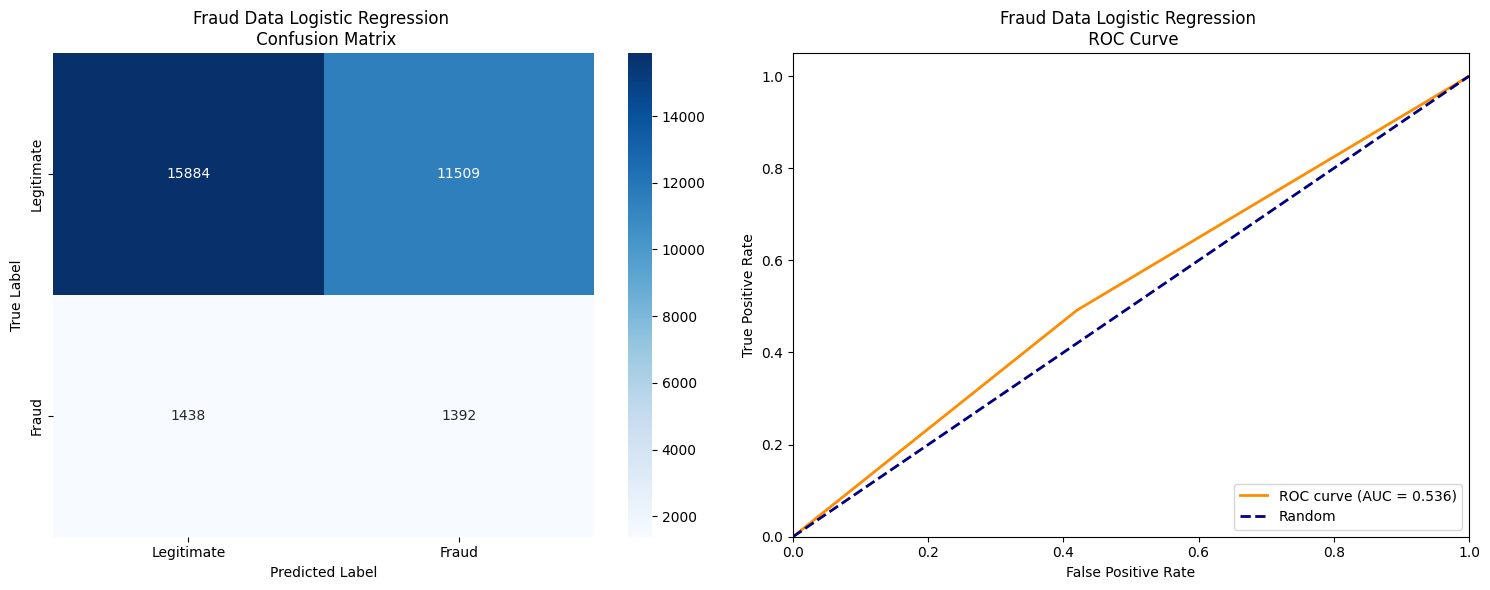

In [19]:
# Visualize Fraud Data Model Performance

# 1. Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 6)) 

# 2. Plot the Confusion Matrix on the first axis (axes[0])
md.plot_confusion_matrix(y_test_fraudData,Fraud_data_Model_y_pred,ax=axes[0]);
axes[0].set_title("Fraud Data Logistic Regression \n Confusion Matrix")

# 3. Plot the ROC Curve on the second axis (axes[1])
md.plot_roc_curve(y_test_fraudData,Fraud_data_Model_y_pred,ax=axes[1]);
axes[1].set_title("Fraud Data Logistic Regression \n ROC Curve")

plt.tight_layout()
plt.show()

### 3. Build Ensemble Model

In [20]:
# Train Credit Card Random Forest Model
model_creditCard_rand_forest = md.train_random_forest(X_train_creditCard,y_train_creditCard)


TRAINING RANDOM FOREST
Model parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 200, 'n_jobs': -1, 'oob_score': False, 'random_state': 42, 'verbose': 1, 'warm_start': False}
Training...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 22 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 156 tasks      | elapsed:   24.2s


✓ Training complete!


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   29.9s finished


In [21]:
# Train Credit Card XGboost

model_creditCard_Xgboost = md.train_xgboost(X_train_creditCard,y_train_creditCard)


TRAINING XGBOOST
Standard Imbalance: Scale pos weight: 599.48
Model parameters: {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.8, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': 'logloss', 'feature_types': None, 'feature_weights': None, 'gamma': 0.1, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.05, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 7, 'max_leaves': None, 'min_child_weight': 3, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 200, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': np.float64(599.4761904761905), 'subsample': 0.8, 'tree_method': None, 'validate_parameters': Non

In [22]:
# Train Fraud Data Random Forest Model

model_fraudData_rand_forest = md.train_random_forest(X_train_fraudData,y_train_fraudData)


TRAINING RANDOM FOREST
Model parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 200, 'n_jobs': -1, 'oob_score': False, 'random_state': 42, 'verbose': 1, 'warm_start': False}
Training...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 22 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 156 tasks      | elapsed:    5.2s


✓ Training complete!


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    6.9s finished


In [23]:
# Train Fraud Data XGBoost Model

model_fraudData_XGBoost = md.train_xgboost(X_train_fraudData,y_train_fraudData)


TRAINING XGBOOST
Standard Imbalance: Scale pos weight: 9.68
Model parameters: {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.8, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': 'logloss', 'feature_types': None, 'feature_weights': None, 'gamma': 0.1, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.05, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 7, 'max_leaves': None, 'min_child_weight': 3, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 200, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': np.float64(9.678296970232312), 'subsample': 0.8, 'tree_method': None, 'validate_parameters': None,

In [24]:
# Evaluate ensemble Credit Card Model

# Random Forest

Credit_card_Model_metircs_rand_forest, Credit_card_Model_y_pred_rand_forest,Credit_card_Model_y_proba_rand_forest = md.evaluate_model(model_creditCard_rand_forest,X_test_creditCard, y_test_creditCard, model_name="Credit Card Random Forest")


EVALUATING CREDIT CARD RANDOM FOREST


[Parallel(n_jobs=22)]: Using backend ThreadingBackend with 22 concurrent workers.
[Parallel(n_jobs=22)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=22)]: Done 156 tasks      | elapsed:    0.0s
[Parallel(n_jobs=22)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=22)]: Using backend ThreadingBackend with 22 concurrent workers.
[Parallel(n_jobs=22)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=22)]: Done 156 tasks      | elapsed:    0.0s
[Parallel(n_jobs=22)]: Done 200 out of 200 | elapsed:    0.0s finished



Performance Metrics:
  Accuracy:  0.9995
  Precision: 0.9583
  Recall:    0.7263
  F1-Score:  0.8263
  ROC-AUC:   0.9528
  PR-AUC:    0.8142

Confusion Matrix:
  True Negatives:  56648
  False Positives: 3
  False Negatives: 26
  True Positives:  69

Classification Report:
              precision    recall  f1-score   support

  Legitimate       1.00      1.00      1.00     56651
       Fraud       0.96      0.73      0.83        95

    accuracy                           1.00     56746
   macro avg       0.98      0.86      0.91     56746
weighted avg       1.00      1.00      1.00     56746



In [25]:
# Evaluate ensemble Credit Card Model

# XGBoost

Credit_card_Model_metircs_XGBoost, Credit_card_Model_y_pred_XGBoost,Credit_card_Model_y_proba_XGBoost = md.evaluate_model(model_creditCard_Xgboost,X_test_creditCard, y_test_creditCard, model_name="Credit Card XGBoost")


EVALUATING CREDIT CARD XGBOOST

Performance Metrics:
  Accuracy:  0.9994
  Precision: 0.8352
  Recall:    0.8000
  F1-Score:  0.8172
  ROC-AUC:   0.9762
  PR-AUC:    0.8109

Confusion Matrix:
  True Negatives:  56636
  False Positives: 15
  False Negatives: 19
  True Positives:  76

Classification Report:
              precision    recall  f1-score   support

  Legitimate       1.00      1.00      1.00     56651
       Fraud       0.84      0.80      0.82        95

    accuracy                           1.00     56746
   macro avg       0.92      0.90      0.91     56746
weighted avg       1.00      1.00      1.00     56746



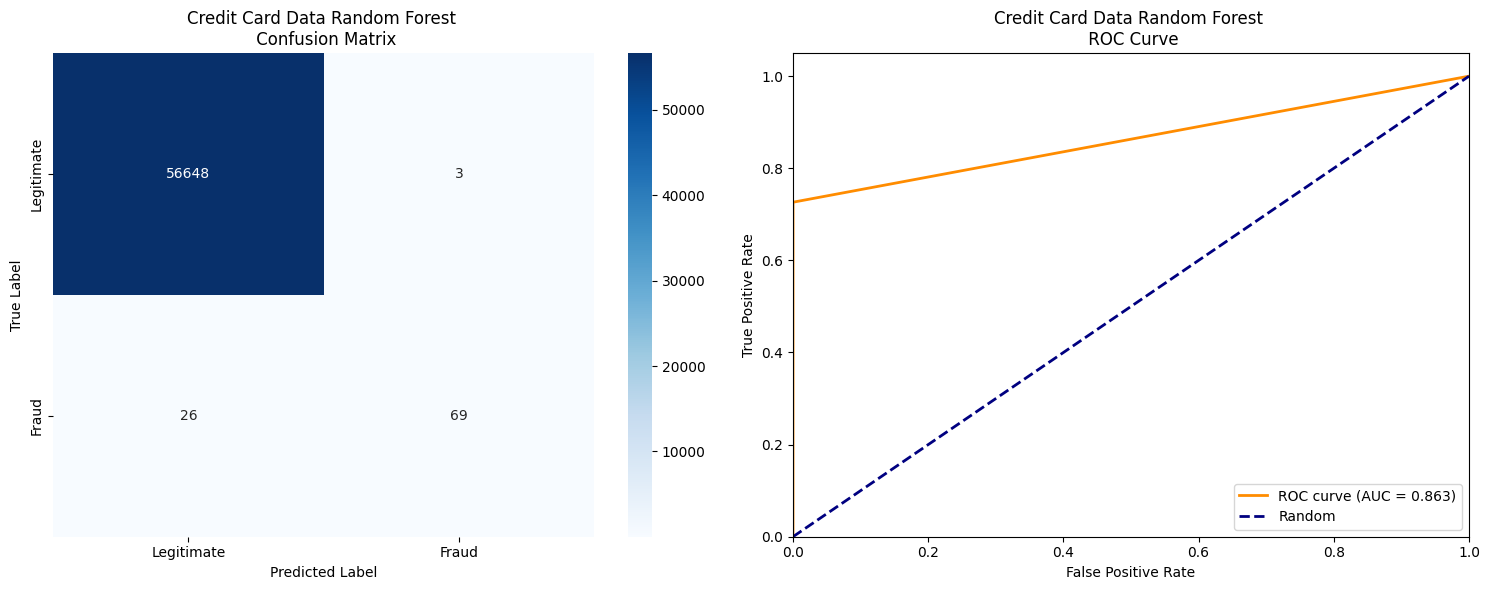

In [26]:
# Visualize the Ensemble Credit Card Models 

# Random Forest

# 1. Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 6)) 

# 2. Plot the Confusion Matrix on the first axis (axes[0])
md.plot_confusion_matrix(y_test_creditCard,Credit_card_Model_y_pred_rand_forest,ax=axes[0]);
axes[0].set_title("Credit Card Data Random Forest \n Confusion Matrix")

# 3. Plot the ROC Curve on the second axis (axes[1])
md.plot_roc_curve(y_test_creditCard,Credit_card_Model_y_pred_rand_forest,ax=axes[1]);
axes[1].set_title("Credit Card Data Random Forest \n ROC Curve")

plt.tight_layout()
plt.show()

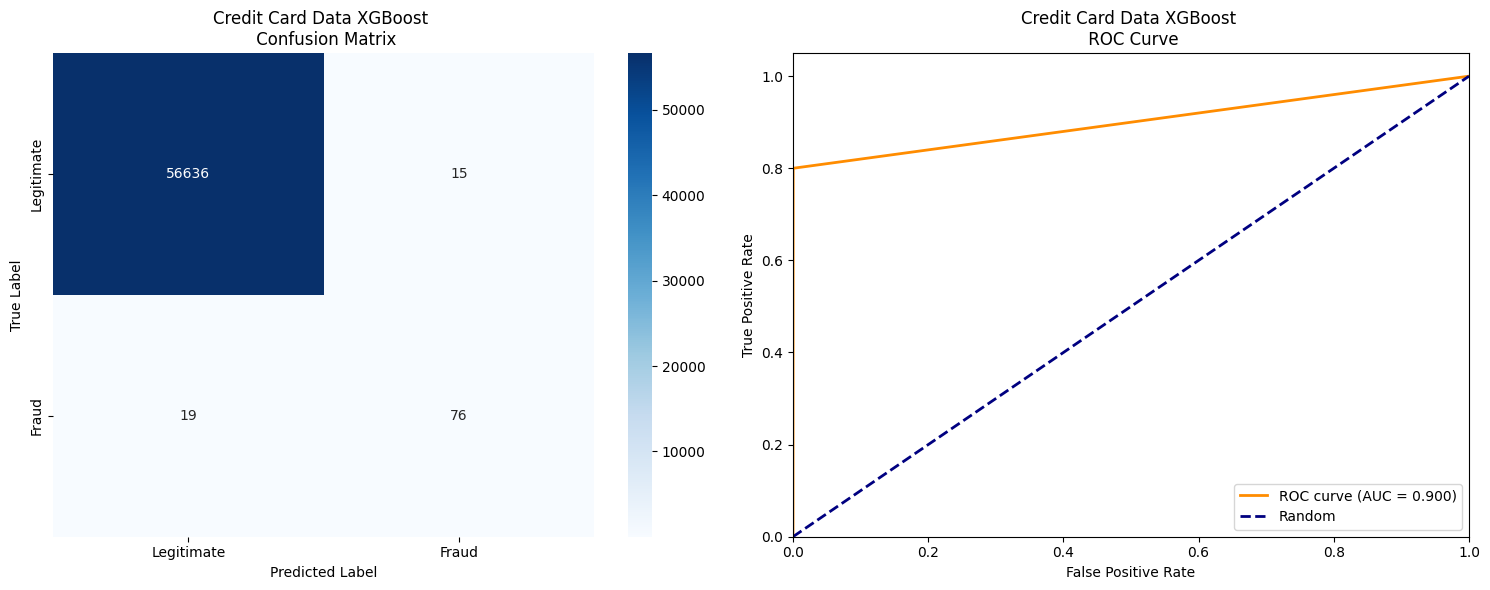

In [27]:
# Visualize the Ensemble Credit Card Models 

# XGBoost

# 1. Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 6)) 

# 2. Plot the Confusion Matrix on the first axis (axes[0])
md.plot_confusion_matrix(y_test_creditCard,Credit_card_Model_y_pred_XGBoost,ax=axes[0]);
axes[0].set_title("Credit Card Data XGBoost \n Confusion Matrix")

# 3. Plot the ROC Curve on the second axis (axes[1])
md.plot_roc_curve(y_test_creditCard,Credit_card_Model_y_pred_XGBoost,ax=axes[1]);
axes[1].set_title("Credit Card Data XGBoost \n ROC Curve")

plt.tight_layout()
plt.show()

In [28]:
# Evaluate ensemble Fraud data Model

# Random Forest

Fraud_data_metircs_rand_forest, Fraud_data_Model_y_pred_rand_forest,Fraud_data_Model_y_proba_rand_forest = md.evaluate_model(model_fraudData_rand_forest,X_test_fraudData, y_test_fraudData, model_name="Fraud Data Random Forest")


EVALUATING FRAUD DATA RANDOM FOREST


[Parallel(n_jobs=22)]: Using backend ThreadingBackend with 22 concurrent workers.
[Parallel(n_jobs=22)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=22)]: Done 156 tasks      | elapsed:    0.0s
[Parallel(n_jobs=22)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=22)]: Using backend ThreadingBackend with 22 concurrent workers.
[Parallel(n_jobs=22)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=22)]: Done 156 tasks      | elapsed:    0.0s
[Parallel(n_jobs=22)]: Done 200 out of 200 | elapsed:    0.0s finished



Performance Metrics:
  Accuracy:  0.8808
  Precision: 0.4010
  Recall:    0.5527
  F1-Score:  0.4648
  ROC-AUC:   0.7612
  PR-AUC:    0.4768

Confusion Matrix:
  True Negatives:  25057
  False Positives: 2336
  False Negatives: 1266
  True Positives:  1564

Classification Report:
              precision    recall  f1-score   support

  Legitimate       0.95      0.91      0.93     27393
       Fraud       0.40      0.55      0.46      2830

    accuracy                           0.88     30223
   macro avg       0.68      0.73      0.70     30223
weighted avg       0.90      0.88      0.89     30223



In [29]:
# Evaluate ensemble Fraud data Model

# XGBoost

Fraud_data_Model_metircs_XGBoost, Fraud_data_Model_y_pred_XGBoost,Fraud_data_Model_y_proba_XGBoost = md.evaluate_model(model_fraudData_XGBoost,X_test_fraudData, y_test_fraudData, model_name="Fraud Data XGBoost")


EVALUATING FRAUD DATA XGBOOST

Performance Metrics:
  Accuracy:  0.6969
  Precision: 0.1691
  Recall:    0.5717
  F1-Score:  0.2610
  ROC-AUC:   0.6930
  PR-AUC:    0.2939

Confusion Matrix:
  True Negatives:  19444
  False Positives: 7949
  False Negatives: 1212
  True Positives:  1618

Classification Report:
              precision    recall  f1-score   support

  Legitimate       0.94      0.71      0.81     27393
       Fraud       0.17      0.57      0.26      2830

    accuracy                           0.70     30223
   macro avg       0.56      0.64      0.54     30223
weighted avg       0.87      0.70      0.76     30223



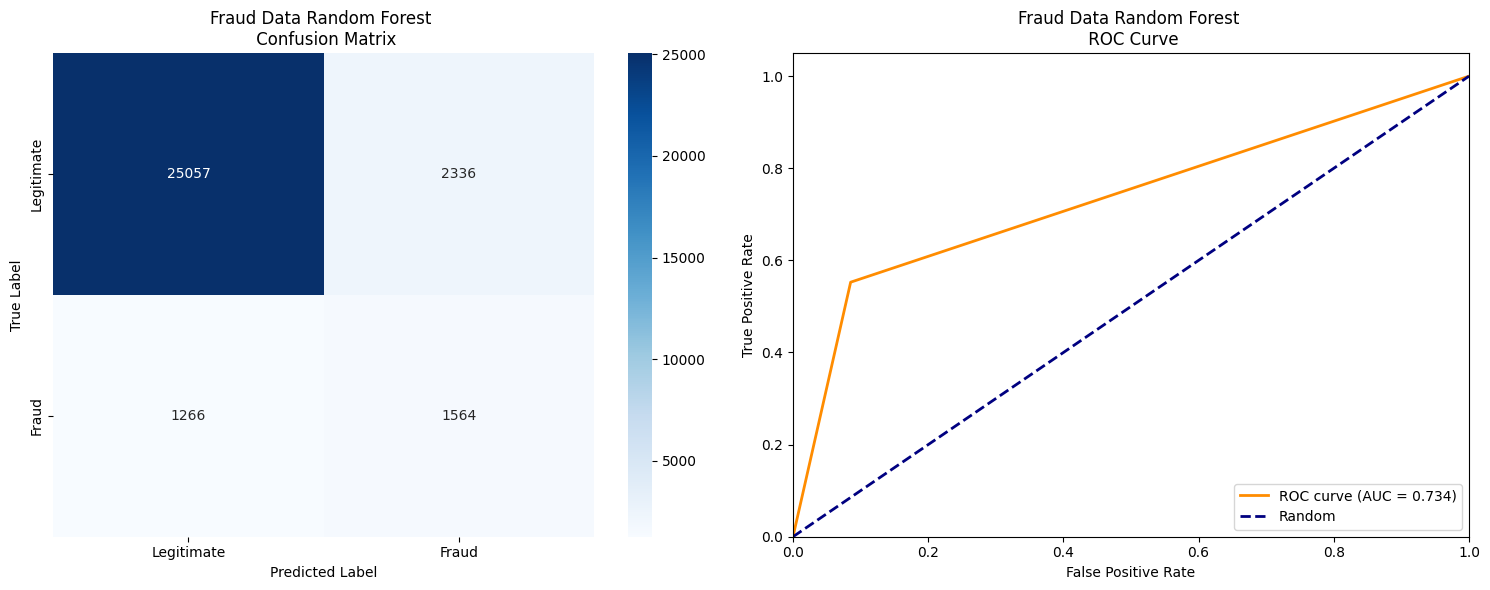

In [30]:
# Visualize the Ensemble Fraud Data Models 

# Random Forest

# 1. Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 6)) 

# 2. Plot the Confusion Matrix on the first axis (axes[0])
md.plot_confusion_matrix(y_test_fraudData,Fraud_data_Model_y_pred_rand_forest,ax=axes[0]);
axes[0].set_title("Fraud Data Random Forest \n Confusion Matrix")

# 3. Plot the ROC Curve on the second axis (axes[1])
md.plot_roc_curve(y_test_fraudData,Fraud_data_Model_y_pred_rand_forest,ax=axes[1]);
axes[1].set_title("Fraud Data Random Forest \n ROC Curve")

plt.tight_layout()
plt.show()

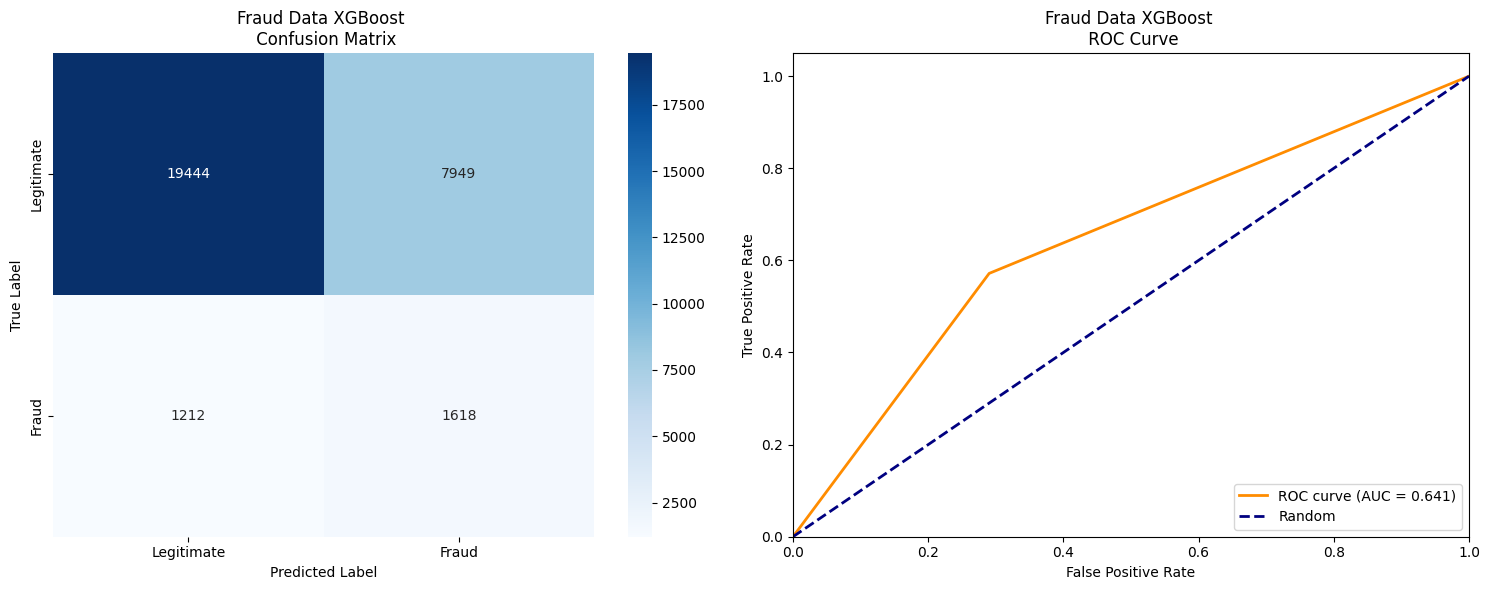

In [31]:
# Visualize the Ensemble Fraud Data Models 

# XGBOOST

# 1. Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 6)) 

# 2. Plot the Confusion Matrix on the first axis (axes[0])
md.plot_confusion_matrix(y_test_fraudData,Fraud_data_Model_y_pred_XGBoost,ax=axes[0]);
axes[0].set_title("Fraud Data XGBoost \n Confusion Matrix")

# 3. Plot the ROC Curve on the second axis (axes[1])
md.plot_roc_curve(y_test_fraudData,Fraud_data_Model_y_pred_XGBoost,ax=axes[1]);
axes[1].set_title("Fraud Data XGBoost \n ROC Curve")

plt.tight_layout()
plt.show()

### 4.	Cross-Validation

In [32]:
# Perform Cross Validation

# Credit Card Model

# 1. Create a dictionary to store results for comparison later
all_model_results_credit_card = {}

# 2. Use a descriptive loop (if models have a name attribute, or use a list of tuples)
models_to_test_credit_card = [
    ("Logistic Regression", model_creditCard),
    ("Random Forest", model_creditCard_rand_forest),
    ("XGBoost", model_creditCard_Xgboost)
]

for name, model in models_to_test_credit_card:
    print(f'Performing Model Cross Evaluation for {name}...')
    
    # Call the function (assuming 'md' is your module alias)
    results = md.perform_cross_validation(model, X_train_creditCard, y_train_creditCard, model_name=name)
    
    # Store results using the name as the key
    all_model_results_credit_card[name] = results


Performing Model Cross Evaluation for Logistic Regression...

CROSS-VALIDATION: LOGISTIC REGRESSION
Performing 5-fold stratified cross-validation...


c:\Users\henokt\OneDrive - Inchcape\Documents\GitHub\Improved-Fraud_Detection\.venv\Lib\site-packages\sklearn\metrics\_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 22 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   32.3s finished



Cross-Validation Results:
  F1          : 0.0926 (+/- 0.0070)
  PRECISION   : 0.0488 (+/- 0.0039)
  RECALL      : 0.9126 (+/- 0.0273)
  ROC_AUC     : 0.9800 (+/- 0.0078)
Performing Model Cross Evaluation for Random Forest...

CROSS-VALIDATION: RANDOM FOREST
Performing 5-fold stratified cross-validation...


c:\Users\henokt\OneDrive - Inchcape\Documents\GitHub\Improved-Fraud_Detection\.venv\Lib\site-packages\sklearn\metrics\_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 22 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.8min finished



Cross-Validation Results:
  F1          : 0.8471 (+/- 0.0425)
  PRECISION   : 0.9342 (+/- 0.0281)
  RECALL      : 0.7778 (+/- 0.0665)
  ROC_AUC     : 0.9621 (+/- 0.0111)
Performing Model Cross Evaluation for XGBoost...

CROSS-VALIDATION: XGBOOST
Performing 5-fold stratified cross-validation...


c:\Users\henokt\OneDrive - Inchcape\Documents\GitHub\Improved-Fraud_Detection\.venv\Lib\site-packages\sklearn\metrics\_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 22 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   10.9s finished



Cross-Validation Results:
  F1          : 0.8412 (+/- 0.0357)
  PRECISION   : 0.8492 (+/- 0.0606)
  RECALL      : 0.8360 (+/- 0.0360)
  ROC_AUC     : 0.9820 (+/- 0.0078)


In [33]:
# Perform Cross Validation

# Fraud Data Model

# 1. Create a dictionary to store results for comparison later
all_model_results_Fraud_data = {}

# 2. Use a descriptive loop (if models have a name attribute, or use a list of tuples)
models_to_test_Fraud_data = [
    ("Logistic Regression", model_fraudData),
    ("Random Forest", model_fraudData_rand_forest),
    ("XGBoost", model_fraudData_XGBoost)
]

for name, model in models_to_test_Fraud_data:
    print(f'Performing Model Cross Evaluation for {name}...')
    
    # Call the function (assuming 'md' is your module alias)
    results = md.perform_cross_validation(model, X_train_fraudData, y_train_fraudData, model_name=name)
    
    # Store results using the name as the key
    all_model_results_Fraud_data[name] = results

Performing Model Cross Evaluation for Logistic Regression...

CROSS-VALIDATION: LOGISTIC REGRESSION
Performing 5-fold stratified cross-validation...


c:\Users\henokt\OneDrive - Inchcape\Documents\GitHub\Improved-Fraud_Detection\.venv\Lib\site-packages\sklearn\metrics\_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 22 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   45.1s finished



Cross-Validation Results:
  F1          : 0.1785 (+/- 0.0040)
  PRECISION   : 0.1087 (+/- 0.0023)
  RECALL      : 0.5000 (+/- 0.0182)
  ROC_AUC     : 0.5553 (+/- 0.0074)
Performing Model Cross Evaluation for Random Forest...

CROSS-VALIDATION: RANDOM FOREST
Performing 5-fold stratified cross-validation...


c:\Users\henokt\OneDrive - Inchcape\Documents\GitHub\Improved-Fraud_Detection\.venv\Lib\site-packages\sklearn\metrics\_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 22 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   39.0s finished



Cross-Validation Results:
  F1          : 0.4592 (+/- 0.0104)
  PRECISION   : 0.3874 (+/- 0.0124)
  RECALL      : 0.5639 (+/- 0.0078)
  ROC_AUC     : 0.7582 (+/- 0.0052)
Performing Model Cross Evaluation for XGBoost...

CROSS-VALIDATION: XGBOOST
Performing 5-fold stratified cross-validation...


c:\Users\henokt\OneDrive - Inchcape\Documents\GitHub\Improved-Fraud_Detection\.venv\Lib\site-packages\sklearn\metrics\_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 22 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   12.6s finished



Cross-Validation Results:
  F1          : 0.2605 (+/- 0.0018)
  PRECISION   : 0.1680 (+/- 0.0015)
  RECALL      : 0.5798 (+/- 0.0060)
  ROC_AUC     : 0.6892 (+/- 0.0044)


### 5.	Model Comparison and Selection


MODEL COMPARISON

                     accuracy  precision    recall  f1_score   roc_auc  \
LogisticRegression  0.967504   0.043342  0.873684  0.082587  0.956712   
Random Forest       0.999489   0.958333  0.726316  0.826347  0.952750   
XGBoost             0.999401   0.835165  0.800000  0.817204  0.976212   

                      pr_auc  
LogisticRegression  0.664332  
Random Forest       0.814202  
XGBoost             0.810871  


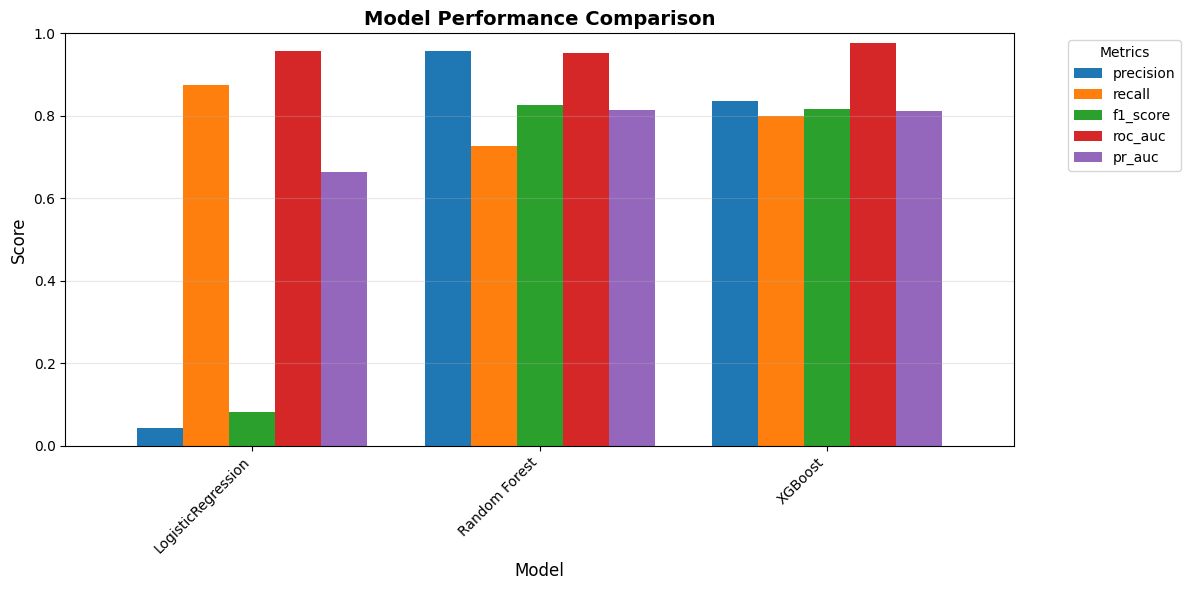

,accuracy,precision,recall,f1_score,roc_auc,pr_auc
LogisticRegression,0.967504,0.043342,0.873684,0.082587,0.956712,0.664332
Random Forest,0.999489,0.958333,0.726316,0.826347,0.952750,0.814202
XGBoost,0.999401,0.835165,0.800000,0.817204,0.976212,0.810871


In [34]:
# Compare credit_card Models
all_metrics_credit_card = {'LogisticRegression':Credit_card_Model_metircs,
                           'Random Forest':Credit_card_Model_metircs_rand_forest,
                           'XGBoost':Credit_card_Model_metircs_XGBoost}

md.compare_models(all_metrics_credit_card)


MODEL COMPARISON

                     accuracy  precision    recall  f1_score   roc_auc  \
LogisticRegression  0.571618   0.107899  0.491873  0.176975  0.552231   
Random Forest       0.880819   0.401026  0.552650  0.464785  0.761220   
XGBoost             0.696886   0.169123  0.571731  0.261031  0.693045   

                      pr_auc  
LogisticRegression  0.119487  
Random Forest       0.476837  
XGBoost             0.293927  


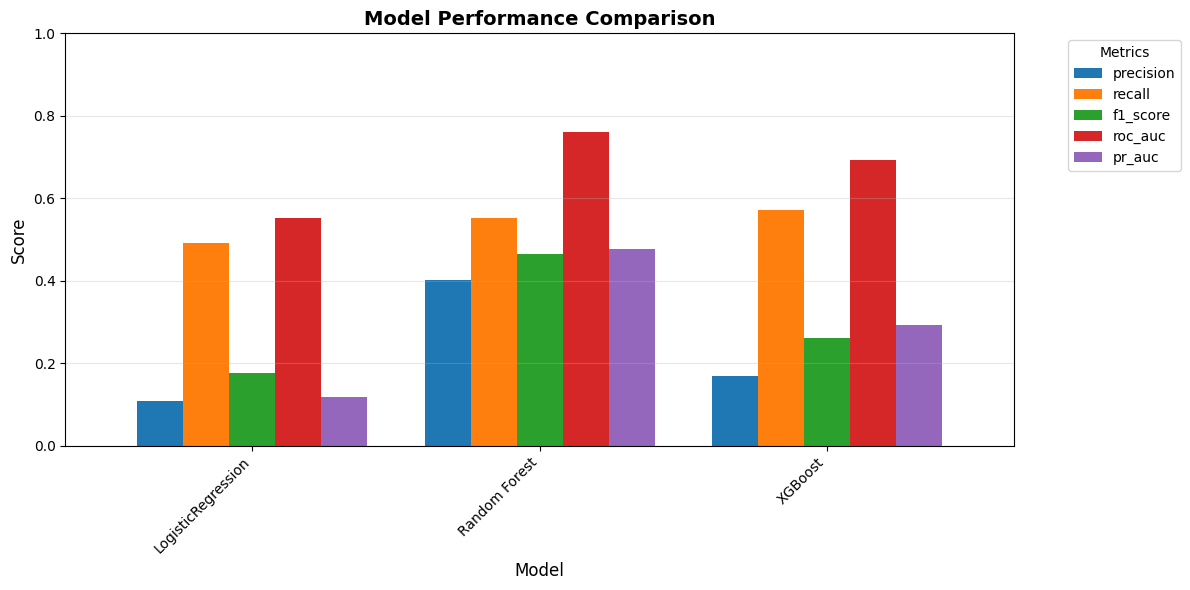

,accuracy,precision,recall,f1_score,roc_auc,pr_auc
LogisticRegression,0.571618,0.107899,0.491873,0.176975,0.552231,0.119487
Random Forest,0.880819,0.401026,0.552650,0.464785,0.761220,0.476837
XGBoost,0.696886,0.169123,0.571731,0.261031,0.693045,0.293927


In [35]:
# Compare Fraud Data Models

all_metrics_fraud_data = {'LogisticRegression':Fraud_data_Model_metircs,
                           'Random Forest':Fraud_data_metircs_rand_forest,
                           'XGBoost':Fraud_data_Model_metircs_XGBoost}

md.compare_models(all_metrics_fraud_data)

### Pahse 2 : With Class Imbalance Handling

### Apply SMOTE to Train Data

In [36]:
# APply SMOTE to Train Data fro Both Credit Card & Fraud Data 

X_train_creditCard_smote,y_train_creditCard_smote=dp.handle_imbalance_smote(X_train_creditCard,y_train_creditCard)
X_train_fraudData_smote,y_train_fraudData_smote = dp.handle_imbalance_smote(X_train_fraudData,y_train_fraudData)


HANDLING CLASS IMBALANCE - SMOTE
Original class distribution:
  Class 0 (Legitimate): 226602
  Class 1 (Fraud): 378
  Ratio: 599.48:1

Resampled class distribution:
  Class 0 (Legitimate): 226602
  Class 1 (Fraud): 113301
  Ratio: 2.00:1

HANDLING CLASS IMBALANCE - SMOTE
Original class distribution:
  Class 0 (Legitimate): 109568
  Class 1 (Fraud): 11321
  Ratio: 9.68:1

Resampled class distribution:
  Class 0 (Legitimate): 109568
  Class 1 (Fraud): 54784
  Ratio: 2.00:1


### 2. Build Baseline Model

In [37]:
# Train baseline Models using the SMOTE data

model_creditCard_SMOTE = md.train_logistic_regression(X_train_creditCard_smote,y_train_creditCard_smote)
model_fraudData_SMOTE= md.train_logistic_regression(X_train_fraudData_smote,y_train_fraudData_smote)


TRAINING LOGISTIC REGRESSION
Model parameters: {'C': 1.0, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': -1, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Training...
✓ Training complete!

TRAINING LOGISTIC REGRESSION
Model parameters: {'C': 1.0, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': -1, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Training...
✓ Training complete!


In [38]:
# Evaluate Models

# Evaluate Credit Card SMOTE Model

Credit_card_Model_metircs_SMOTE, Credit_card_Model_y_pred_SMOTE,Credit_card_Model_y_proba_SMOTE = md.evaluate_model(model_creditCard_SMOTE,X_test_creditCard, y_test_creditCard, model_name="Credit Card Logistic Regression USING SMOTE")


EVALUATING CREDIT CARD LOGISTIC REGRESSION USING SMOTE

Performance Metrics:
  Accuracy:  0.9891
  Precision: 0.1179
  Recall:    0.8526
  F1-Score:  0.2072
  ROC-AUC:   0.9528
  PR-AUC:    0.7186

Confusion Matrix:
  True Negatives:  56045
  False Positives: 606
  False Negatives: 14
  True Positives:  81

Classification Report:
              precision    recall  f1-score   support

  Legitimate       1.00      0.99      0.99     56651
       Fraud       0.12      0.85      0.21        95

    accuracy                           0.99     56746
   macro avg       0.56      0.92      0.60     56746
weighted avg       1.00      0.99      0.99     56746



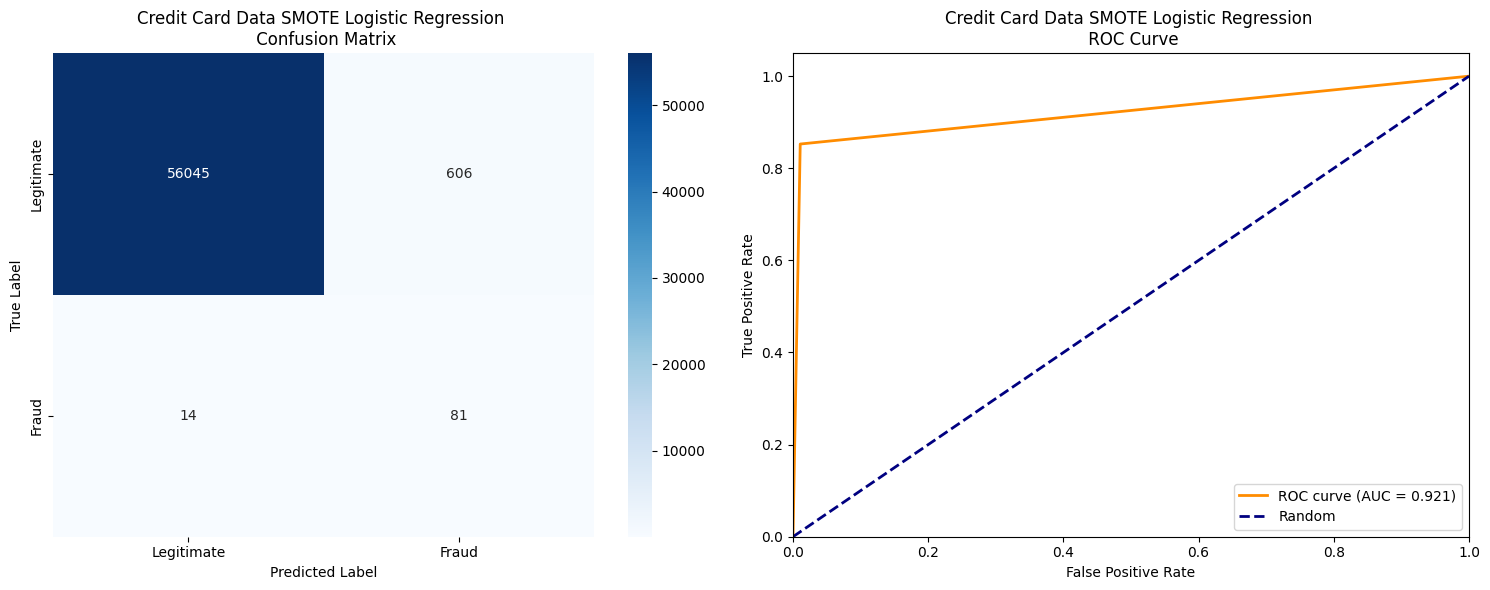

In [39]:
# Visualize Credit Card SMOTE Model Performance

# 1. Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 6)) 

# 2. Plot the Confusion Matrix on the first axis (axes[0])
md.plot_confusion_matrix(y_test_creditCard,Credit_card_Model_y_pred_SMOTE,ax=axes[0]);
axes[0].set_title("Credit Card Data SMOTE Logistic Regression \n Confusion Matrix")

# 3. Plot the ROC Curve on the second axis (axes[1])
md.plot_roc_curve(y_test_creditCard,Credit_card_Model_y_pred_SMOTE,ax=axes[1]);
axes[1].set_title("Credit Card Data SMOTE Logistic Regression \n ROC Curve")

plt.tight_layout()
plt.show()

In [40]:
# Evaluate Models

# Evaluate Fraud Data SMOTE Model

Fraud_data_Model_metircs_SMOTE, Fraud_data_Model_y_pred_SMOTE,Fraud_data_Model_y_proba_SMOTE = md.evaluate_model(model_fraudData_SMOTE,X_test_fraudData, y_test_fraudData, model_name="Fraud Data SMOTE Logistic Regression")


EVALUATING FRAUD DATA SMOTE LOGISTIC REGRESSION

Performance Metrics:
  Accuracy:  0.5231
  Precision: 0.1047
  Recall:    0.5417
  F1-Score:  0.1754
  ROC-AUC:   0.5493
  PR-AUC:    0.1188

Confusion Matrix:
  True Negatives:  14278
  False Positives: 13115
  False Negatives: 1297
  True Positives:  1533

Classification Report:
              precision    recall  f1-score   support

  Legitimate       0.92      0.52      0.66     27393
       Fraud       0.10      0.54      0.18      2830

    accuracy                           0.52     30223
   macro avg       0.51      0.53      0.42     30223
weighted avg       0.84      0.52      0.62     30223



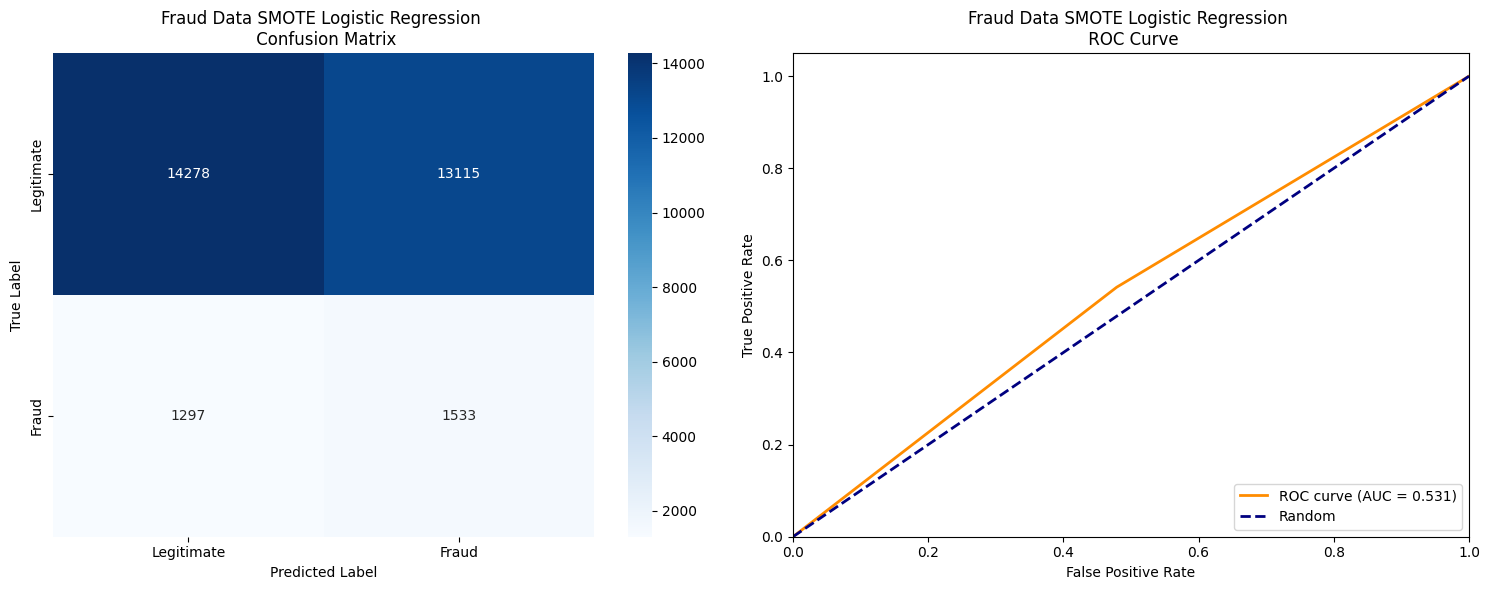

In [41]:
# Visualize Fraud Data SMOTE Model Performance

# 1. Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 6)) 

# 2. Plot the Confusion Matrix on the first axis (axes[0])
md.plot_confusion_matrix(y_test_fraudData,Fraud_data_Model_y_pred_SMOTE,ax=axes[0]);
axes[0].set_title("Fraud Data SMOTE Logistic Regression \n Confusion Matrix")

# 3. Plot the ROC Curve on the second axis (axes[1])
md.plot_roc_curve(y_test_fraudData,Fraud_data_Model_y_pred_SMOTE,ax=axes[1]);
axes[1].set_title("Fraud Data SMOTE Logistic Regression \n ROC Curve")

plt.tight_layout()
plt.show()

### 3. Build Ensemble Model

In [42]:
# Build Ensemble Models on SMOTE

model_creditCard_rand_forest_SMOTE = md.train_random_forest(X_train_creditCard_smote,y_train_creditCard_smote)
model_creditCard_Xgboost_SMOTE = md.train_xgboost(X_train_creditCard_smote,y_train_creditCard_smote,use_smote_data=True)

model_fraudData_rand_forest_SMOTE = md.train_random_forest(X_train_fraudData_smote,y_train_fraudData_smote)
model_fraudData_XGBoost_SMOTE = md.train_xgboost(X_train_fraudData_smote,y_train_fraudData_smote,use_smote_data=True)


TRAINING RANDOM FOREST
Model parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 200, 'n_jobs': -1, 'oob_score': False, 'random_state': 42, 'verbose': 1, 'warm_start': False}
Training...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 22 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 156 tasks      | elapsed:   51.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.1min finished


✓ Training complete!

TRAINING XGBOOST
SMOTE detected: Setting scale_pos_weight to 1.0 to avoid over-bias.
Model parameters: {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.8, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': 'logloss', 'feature_types': None, 'feature_weights': None, 'gamma': 0.1, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.05, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 7, 'max_leaves': None, 'min_child_weight': 3, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 200, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': 1.0, 'subsample': 0.8, 'tree_method': None, 'validat

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 22 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 156 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    7.5s finished


✓ Training complete!

TRAINING XGBOOST
SMOTE detected: Setting scale_pos_weight to 1.0 to avoid over-bias.
Model parameters: {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.8, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': 'logloss', 'feature_types': None, 'feature_weights': None, 'gamma': 0.1, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.05, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 7, 'max_leaves': None, 'min_child_weight': 3, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 200, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': 1.0, 'subsample': 0.8, 'tree_method': None, 'validat

In [43]:
# Evaluate Models

# Evaluate Credit Card SMOTE Model

Credit_card_Model_metircs_SMOTE_rand_forest, Credit_card_Model_y_pred_SMOTE_rand_forest,Credit_card_Model_y_proba_SMOTE_rand_forest = md.evaluate_model(model_creditCard_rand_forest_SMOTE,X_test_creditCard, y_test_creditCard, model_name="Credit Card Random Forest USING SMOTE")
Credit_card_Model_metircs_SMOTE_XGBoost, Credit_card_Model_y_pred_SMOTE_XGBoost,Credit_card_Model_y_proba_SMOTE_XGBoost = md.evaluate_model(model_creditCard_Xgboost_SMOTE,X_test_creditCard, y_test_creditCard, model_name="Credit Card XGBOOST USING SMOTE")

# Evaluate Fraud Data SMOTE Model

Fraud_data_Model_metircs_SMOTE_rand_forest, Fraud_data_Model_y_pred_SMOTE_rand_forest,Fraud_data_Model_y_proba_SMOTE_rand_forest = md.evaluate_model(model_fraudData_rand_forest_SMOTE,X_test_fraudData, y_test_fraudData, model_name="Fraud Data SMOTE Random Forest")
Fraud_data_Model_metircs_SMOTE_XGBoost, Fraud_data_Model_y_pred_SMOTE_XGBoost,Fraud_data_Model_y_proba_SMOTE_XGBoost = md.evaluate_model(model_fraudData_XGBoost_SMOTE,X_test_fraudData, y_test_fraudData, model_name="Fraud Data SMOTE XGBOOST")


EVALUATING CREDIT CARD RANDOM FOREST USING SMOTE


[Parallel(n_jobs=22)]: Using backend ThreadingBackend with 22 concurrent workers.
[Parallel(n_jobs=22)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=22)]: Done 156 tasks      | elapsed:    0.0s
[Parallel(n_jobs=22)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=22)]: Using backend ThreadingBackend with 22 concurrent workers.
[Parallel(n_jobs=22)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=22)]: Done 156 tasks      | elapsed:    0.0s
[Parallel(n_jobs=22)]: Done 200 out of 200 | elapsed:    0.0s finished



Performance Metrics:
  Accuracy:  0.9995
  Precision: 0.8916
  Recall:    0.7789
  F1-Score:  0.8315
  ROC-AUC:   0.9594
  PR-AUC:    0.8228

Confusion Matrix:
  True Negatives:  56642
  False Positives: 9
  False Negatives: 21
  True Positives:  74

Classification Report:
              precision    recall  f1-score   support

  Legitimate       1.00      1.00      1.00     56651
       Fraud       0.89      0.78      0.83        95

    accuracy                           1.00     56746
   macro avg       0.95      0.89      0.92     56746
weighted avg       1.00      1.00      1.00     56746


EVALUATING CREDIT CARD XGBOOST USING SMOTE

Performance Metrics:
  Accuracy:  0.9993
  Precision: 0.7677
  Recall:    0.8000
  F1-Score:  0.7835
  ROC-AUC:   0.9708
  PR-AUC:    0.7988

Confusion Matrix:
  True Negatives:  56628
  False Positives: 23
  False Negatives: 19
  True Positives:  76

Classification Report:
              precision    recall  f1-score   support

  Legitimate       1.00

[Parallel(n_jobs=22)]: Using backend ThreadingBackend with 22 concurrent workers.
[Parallel(n_jobs=22)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=22)]: Done 156 tasks      | elapsed:    0.0s
[Parallel(n_jobs=22)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=22)]: Using backend ThreadingBackend with 22 concurrent workers.
[Parallel(n_jobs=22)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=22)]: Done 156 tasks      | elapsed:    0.0s
[Parallel(n_jobs=22)]: Done 200 out of 200 | elapsed:    0.0s finished



Performance Metrics:
  Accuracy:  0.8914
  Precision: 0.4288
  Recall:    0.4813
  F1-Score:  0.4535
  ROC-AUC:   0.7505
  PR-AUC:    0.4425

Confusion Matrix:
  True Negatives:  25579
  False Positives: 1814
  False Negatives: 1468
  True Positives:  1362

Classification Report:
              precision    recall  f1-score   support

  Legitimate       0.95      0.93      0.94     27393
       Fraud       0.43      0.48      0.45      2830

    accuracy                           0.89     30223
   macro avg       0.69      0.71      0.70     30223
weighted avg       0.90      0.89      0.89     30223


EVALUATING FRAUD DATA SMOTE XGBOOST

Performance Metrics:
  Accuracy:  0.9096
  Precision: 0.7324
  Recall:    0.0551
  F1-Score:  0.1025
  ROC-AUC:   0.6822
  PR-AUC:    0.2788

Confusion Matrix:
  True Negatives:  27336
  False Positives: 57
  False Negatives: 2674
  True Positives:  156

Classification Report:
              precision    recall  f1-score   support

  Legitimate       0

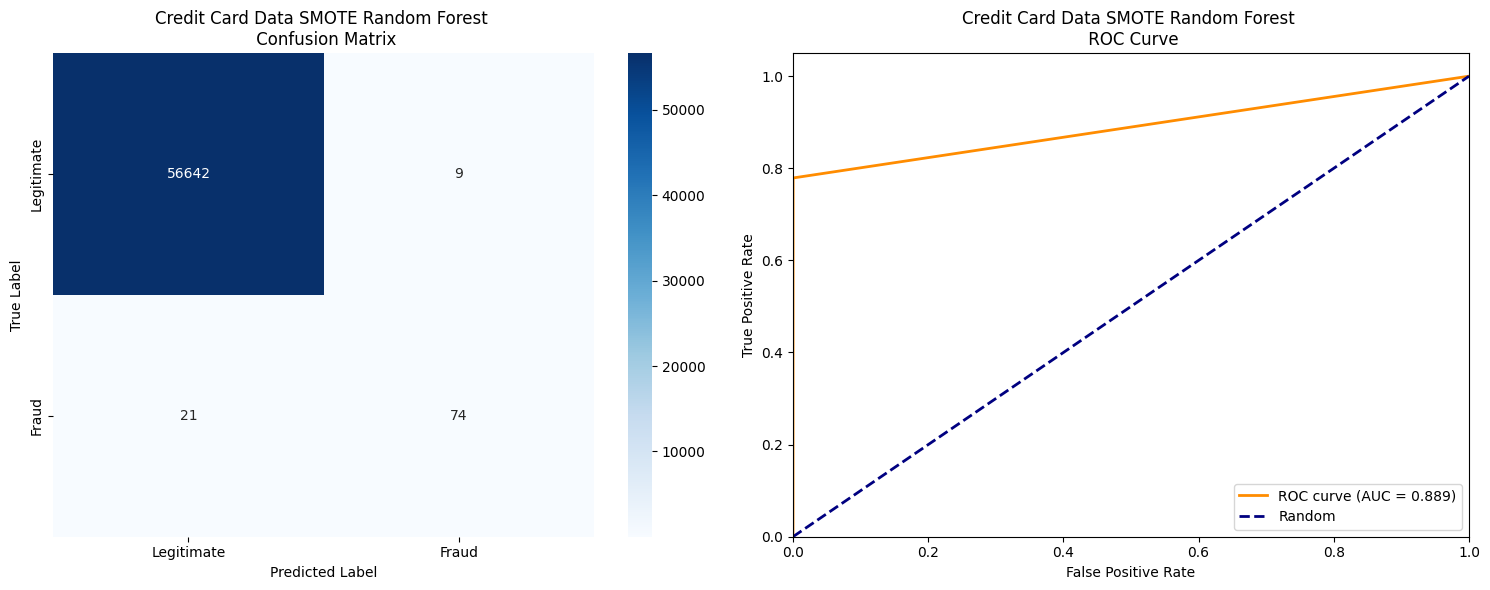

In [44]:
# Visualize the Ensemble Credit Card Models 

# Random Forest

# 1. Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 6)) 

# 2. Plot the Confusion Matrix on the first axis (axes[0])
md.plot_confusion_matrix(y_test_creditCard,Credit_card_Model_y_pred_SMOTE_rand_forest,ax=axes[0]);
axes[0].set_title("Credit Card Data SMOTE Random Forest \n Confusion Matrix")

# 3. Plot the ROC Curve on the second axis (axes[1])
md.plot_roc_curve(y_test_creditCard,Credit_card_Model_y_pred_SMOTE_rand_forest,ax=axes[1]);
axes[1].set_title("Credit Card Data SMOTE Random Forest \n ROC Curve")

plt.tight_layout()
plt.show()

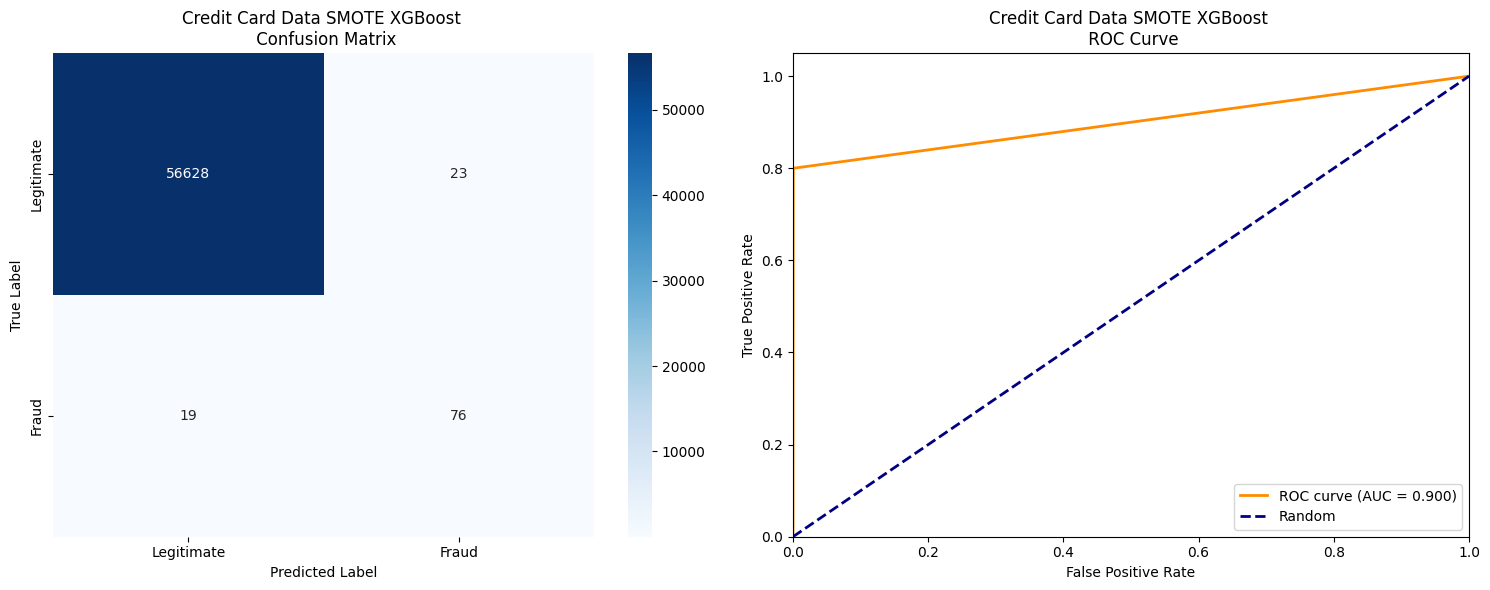

In [45]:
# Visualize the Ensemble Credit Card Models 

# XGBOOST

# 1. Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 6)) 

# 2. Plot the Confusion Matrix on the first axis (axes[0])
md.plot_confusion_matrix(y_test_creditCard,Credit_card_Model_y_pred_SMOTE_XGBoost,ax=axes[0]);
axes[0].set_title("Credit Card Data SMOTE XGBoost \n Confusion Matrix")

# 3. Plot the ROC Curve on the second axis (axes[1])
md.plot_roc_curve(y_test_creditCard,Credit_card_Model_y_pred_SMOTE_XGBoost,ax=axes[1]);
axes[1].set_title("Credit Card Data SMOTE XGBoost \n ROC Curve")

plt.tight_layout()
plt.show()

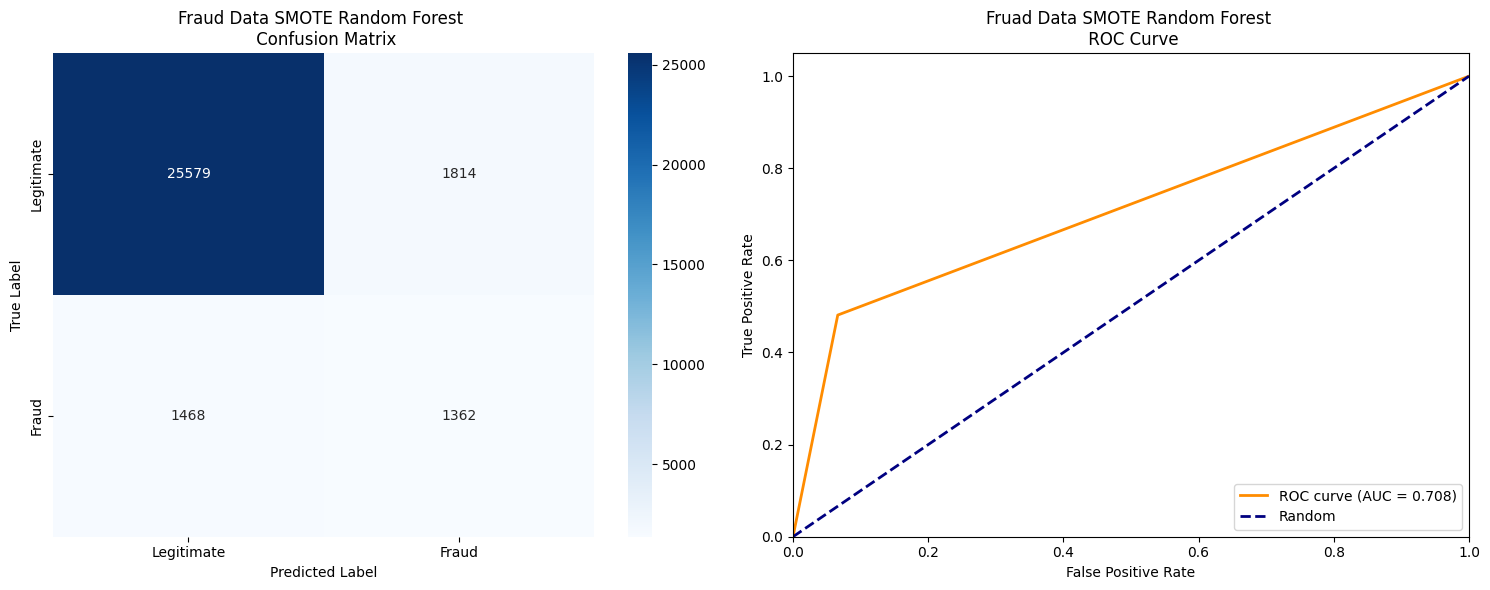

In [46]:
# Visualize the Ensemble Fraud Data Models 

# Random Forest

# 1. Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 6)) 

# 2. Plot the Confusion Matrix on the first axis (axes[0])
md.plot_confusion_matrix(y_test_fraudData,Fraud_data_Model_y_pred_SMOTE_rand_forest,ax=axes[0]);
axes[0].set_title("Fraud Data SMOTE Random Forest \n Confusion Matrix")

# 3. Plot the ROC Curve on the second axis (axes[1])
md.plot_roc_curve(y_test_fraudData,Fraud_data_Model_y_pred_SMOTE_rand_forest,ax=axes[1]);
axes[1].set_title("Fruad Data SMOTE Random Forest \n ROC Curve")

plt.tight_layout()
plt.show()

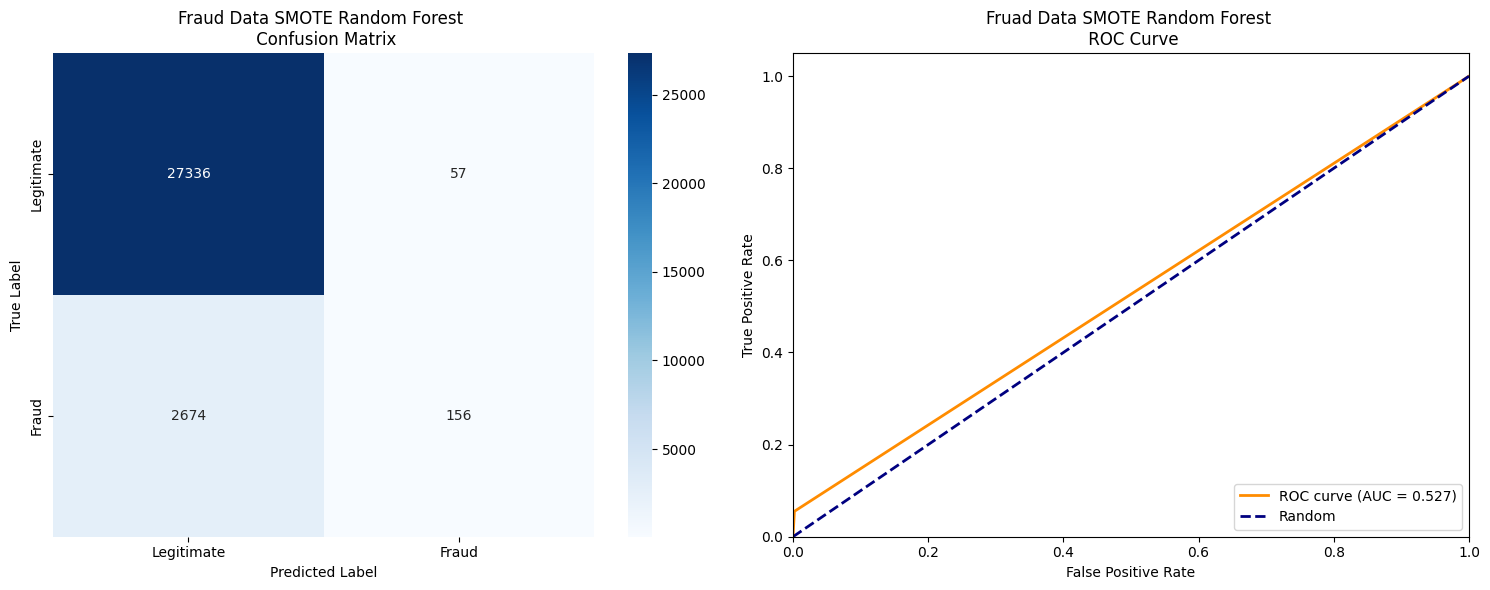

In [47]:
# Visualize the Ensemble Fraud Data Models 

# XGBOOST
# 1. Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 6)) 

# 2. Plot the Confusion Matrix on the first axis (axes[0])
md.plot_confusion_matrix(y_test_fraudData,Fraud_data_Model_y_pred_SMOTE_XGBoost,ax=axes[0]);
axes[0].set_title("Fraud Data SMOTE Random Forest \n Confusion Matrix")

# 3. Plot the ROC Curve on the second axis (axes[1])
md.plot_roc_curve(y_test_fraudData,Fraud_data_Model_y_pred_SMOTE_XGBoost,ax=axes[1]);
axes[1].set_title("Fruad Data SMOTE Random Forest \n ROC Curve")

plt.tight_layout()
plt.show()


### 4. Perform Cross Validation

In [48]:
# Perform Cross Validation

# Credit Card Model

# 1. Create a dictionary to store results for comparison later
all_model_results_credit_card_SMOTE = {}

# 2. Use a descriptive loop (if models have a name attribute, or use a list of tuples)
models_to_test_credit_card_SMOTE = [
    ("Logistic Regression", model_creditCard_SMOTE),
    ("Random Forest", model_creditCard_rand_forest_SMOTE),
    ("XGBoost", model_creditCard_Xgboost_SMOTE)
]

for name, model in models_to_test_credit_card_SMOTE:
    print(f'Performing Model Cross Evaluation for {name}...')
    
    # Call the function (assuming 'md' is your module alias)
    results = md.perform_cross_validation(model, X_train_creditCard, y_train_creditCard, model_name=name)
    
    # Store results using the name as the key
    all_model_results_credit_card_SMOTE[name] = results

Performing Model Cross Evaluation for Logistic Regression...

CROSS-VALIDATION: LOGISTIC REGRESSION
Performing 5-fold stratified cross-validation...


c:\Users\henokt\OneDrive - Inchcape\Documents\GitHub\Improved-Fraud_Detection\.venv\Lib\site-packages\sklearn\metrics\_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 22 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   21.4s finished



Cross-Validation Results:
  F1          : 0.0926 (+/- 0.0070)
  PRECISION   : 0.0488 (+/- 0.0039)
  RECALL      : 0.9126 (+/- 0.0273)
  ROC_AUC     : 0.9800 (+/- 0.0078)
Performing Model Cross Evaluation for Random Forest...

CROSS-VALIDATION: RANDOM FOREST
Performing 5-fold stratified cross-validation...


c:\Users\henokt\OneDrive - Inchcape\Documents\GitHub\Improved-Fraud_Detection\.venv\Lib\site-packages\sklearn\metrics\_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 22 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.6min finished
c:\Users\henokt\OneDrive - Inchcape\Documents\GitHub\Improved-Fraud_Detection\.venv\Lib\site-packages\sklearn\metrics\_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 22 concurrent workers.



Cross-Validation Results:
  F1          : 0.8471 (+/- 0.0425)
  PRECISION   : 0.9342 (+/- 0.0281)
  RECALL      : 0.7778 (+/- 0.0665)
  ROC_AUC     : 0.9621 (+/- 0.0111)
Performing Model Cross Evaluation for XGBoost...

CROSS-VALIDATION: XGBOOST
Performing 5-fold stratified cross-validation...


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.8s finished



Cross-Validation Results:
  F1          : 0.8654 (+/- 0.0275)
  PRECISION   : 0.9505 (+/- 0.0351)
  RECALL      : 0.7988 (+/- 0.0636)
  ROC_AUC     : 0.9830 (+/- 0.0062)


In [49]:
# Perform Cross Validation

# Fraud Data Model

# 1. Create a dictionary to store results for comparison later
all_model_results_Fraud_data_SMOTE = {}

# 2. Use a descriptive loop (if models have a name attribute, or use a list of tuples)
models_to_test_Fraud_data_SMOTE = [
    ("Logistic Regression", model_fraudData_SMOTE),
    ("Random Forest", model_fraudData_rand_forest_SMOTE),
    ("XGBoost", model_fraudData_XGBoost_SMOTE)
]

for name, model in models_to_test_Fraud_data:
    print(f'Performing Model Cross Evaluation for {name}...')
    
    # Call the function (assuming 'md' is your module alias)
    results = md.perform_cross_validation(model, X_train_fraudData, y_train_fraudData, model_name=name)
    
    # Store results using the name as the key
    all_model_results_Fraud_data_SMOTE[name] = results

Performing Model Cross Evaluation for Logistic Regression...

CROSS-VALIDATION: LOGISTIC REGRESSION
Performing 5-fold stratified cross-validation...


c:\Users\henokt\OneDrive - Inchcape\Documents\GitHub\Improved-Fraud_Detection\.venv\Lib\site-packages\sklearn\metrics\_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 22 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   32.4s finished



Cross-Validation Results:
  F1          : 0.1785 (+/- 0.0040)
  PRECISION   : 0.1087 (+/- 0.0023)
  RECALL      : 0.5000 (+/- 0.0182)
  ROC_AUC     : 0.5553 (+/- 0.0074)
Performing Model Cross Evaluation for Random Forest...

CROSS-VALIDATION: RANDOM FOREST
Performing 5-fold stratified cross-validation...


c:\Users\henokt\OneDrive - Inchcape\Documents\GitHub\Improved-Fraud_Detection\.venv\Lib\site-packages\sklearn\metrics\_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 22 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   23.6s finished



Cross-Validation Results:
  F1          : 0.4592 (+/- 0.0104)
  PRECISION   : 0.3874 (+/- 0.0124)
  RECALL      : 0.5639 (+/- 0.0078)
  ROC_AUC     : 0.7582 (+/- 0.0052)
Performing Model Cross Evaluation for XGBoost...

CROSS-VALIDATION: XGBOOST
Performing 5-fold stratified cross-validation...


c:\Users\henokt\OneDrive - Inchcape\Documents\GitHub\Improved-Fraud_Detection\.venv\Lib\site-packages\sklearn\metrics\_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 22 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   12.7s finished



Cross-Validation Results:
  F1          : 0.2605 (+/- 0.0018)
  PRECISION   : 0.1680 (+/- 0.0015)
  RECALL      : 0.5798 (+/- 0.0060)
  ROC_AUC     : 0.6892 (+/- 0.0044)


### 5. Model Comparison & Selection


MODEL COMPARISON

                     accuracy  precision    recall  f1_score   roc_auc  \
LogisticRegression  0.967504   0.043342  0.873684  0.082587  0.956712   
Random Forest       0.999489   0.958333  0.726316  0.826347  0.952750   
XGBoost             0.999401   0.835165  0.800000  0.817204  0.976212   

                      pr_auc  
LogisticRegression  0.664332  
Random Forest       0.814202  
XGBoost             0.810871  


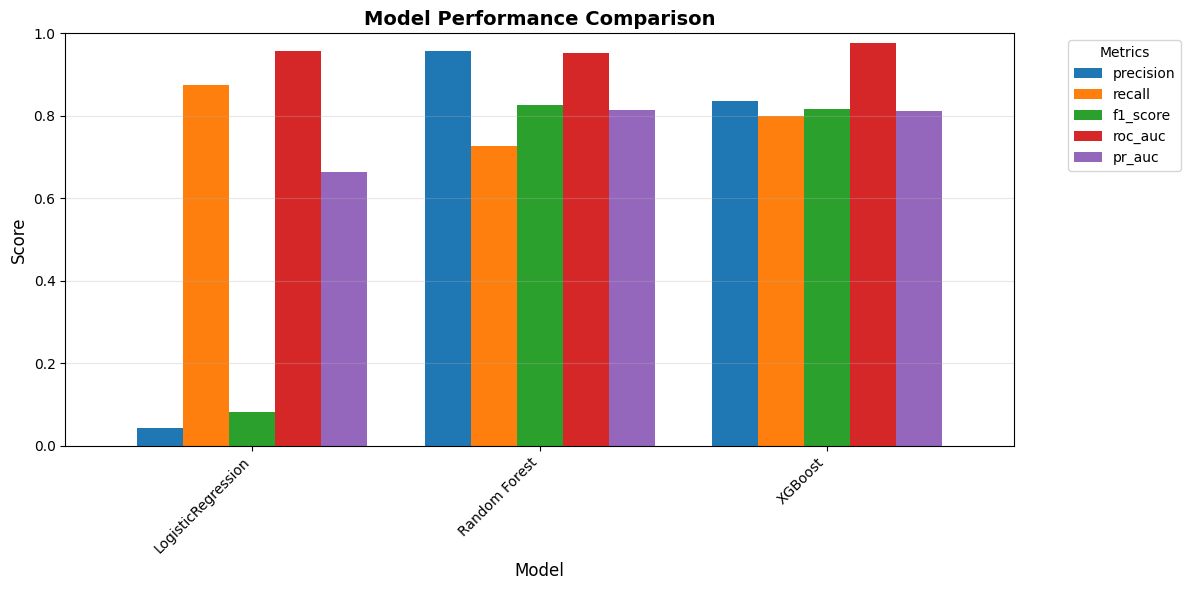

,accuracy,precision,recall,f1_score,roc_auc,pr_auc
LogisticRegression,0.967504,0.043342,0.873684,0.082587,0.956712,0.664332
Random Forest,0.999489,0.958333,0.726316,0.826347,0.952750,0.814202
XGBoost,0.999401,0.835165,0.800000,0.817204,0.976212,0.810871


In [50]:
# Compare credit_card SMOTE Models
all_metrics_credit_card_SMOTE = {'LogisticRegression SMOTE':Credit_card_Model_metircs_SMOTE,
                           'Random Forest SMOTE':Credit_card_Model_metircs_SMOTE_rand_forest,
                           'XGBoost SMOTE':Credit_card_Model_metircs_SMOTE_XGBoost}

md.compare_models(all_metrics_credit_card)


MODEL COMPARISON

                     accuracy  precision    recall  f1_score   roc_auc  \
LogisticRegression  0.571618   0.107899  0.491873  0.176975  0.552231   
Random Forest       0.880819   0.401026  0.552650  0.464785  0.761220   
XGBoost             0.696886   0.169123  0.571731  0.261031  0.693045   

                      pr_auc  
LogisticRegression  0.119487  
Random Forest       0.476837  
XGBoost             0.293927  


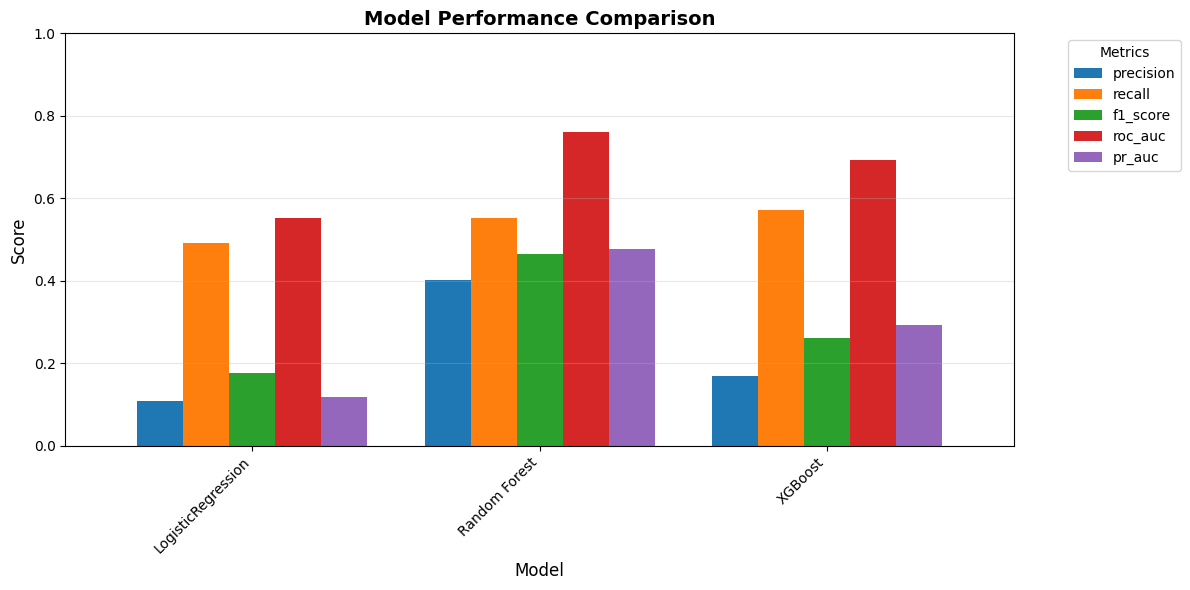

,accuracy,precision,recall,f1_score,roc_auc,pr_auc
LogisticRegression,0.571618,0.107899,0.491873,0.176975,0.552231,0.119487
Random Forest,0.880819,0.401026,0.552650,0.464785,0.761220,0.476837
XGBoost,0.696886,0.169123,0.571731,0.261031,0.693045,0.293927


In [51]:
# Compare Fraud Data SMOTE Models

all_metrics_fraud_data_SMOTE = {'LogisticRegression SMOTE':Fraud_data_Model_metircs_SMOTE,
                           'Random Forest SMOTE':Fraud_data_Model_metircs_SMOTE_rand_forest,
                           'XGBoost SMOTE':Fraud_data_Model_metircs_SMOTE_XGBoost}

md.compare_models(all_metrics_fraud_data)

# Phase 3 

### Overall Model Comparison


MODEL COMPARISON

                                            accuracy  precision    recall  \
LogisticRegression Credit Card Data        0.967504   0.043342  0.873684   
Random Forest Credit Card Data             0.999489   0.958333  0.726316   
XGBoost Credit Card Data                   0.999401   0.835165  0.800000   
LogisticRegression Credit Card Data SMOTE  0.989074   0.117904  0.852632   
Random Forest Credit Card Data SMOTE       0.999471   0.891566  0.778947   
XGBoost Credit Card Data SMOTE             0.999260   0.767677  0.800000   

                                           f1_score   roc_auc    pr_auc  
LogisticRegression Credit Card Data        0.082587  0.956712  0.664332  
Random Forest Credit Card Data             0.826347  0.952750  0.814202  
XGBoost Credit Card Data                   0.817204  0.976212  0.810871  
LogisticRegression Credit Card Data SMOTE  0.207161  0.952794  0.718629  
Random Forest Credit Card Data SMOTE       0.831461  0.959444  0.822779  
XGB

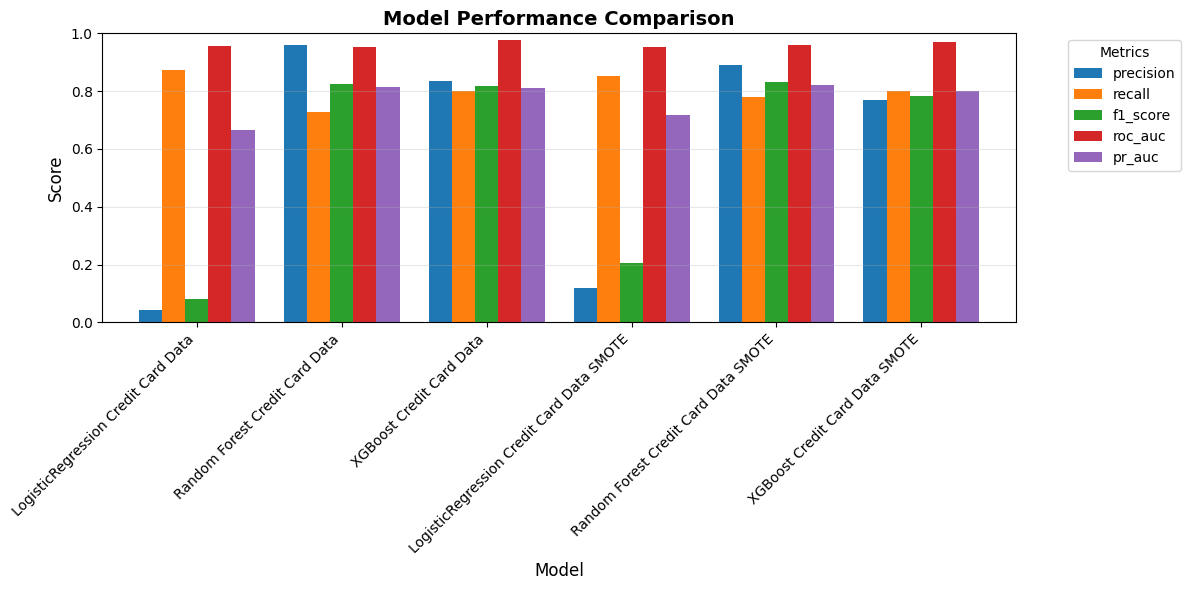

,accuracy,precision,recall,f1_score,roc_auc,pr_auc
LogisticRegression Credit Card Data,0.967504,0.043342,0.873684,0.082587,0.956712,0.664332
Random Forest Credit Card Data,0.999489,0.958333,0.726316,0.826347,0.952750,0.814202
XGBoost Credit Card Data,0.999401,0.835165,0.800000,0.817204,0.976212,0.810871
LogisticRegression Credit Card Data SMOTE,0.989074,0.117904,0.852632,0.207161,0.952794,0.718629
Random Forest Credit Card Data SMOTE,0.999471,0.891566,0.778947,0.831461,0.959444,0.822779
XGBoost Credit Card Data SMOTE,0.999260,0.767677,0.800000,0.783505,0.970769,0.798819


In [52]:
# Compare credit_card Models
all_credit_card_model_metrics = {
                            'LogisticRegression Credit Card Data':Credit_card_Model_metircs,
                           'Random Forest Credit Card Data':Credit_card_Model_metircs_rand_forest,
                           'XGBoost Credit Card Data':Credit_card_Model_metircs_XGBoost,
                            'LogisticRegression Credit Card Data SMOTE':Credit_card_Model_metircs_SMOTE,
                           'Random Forest Credit Card Data SMOTE':Credit_card_Model_metircs_SMOTE_rand_forest,
                           'XGBoost Credit Card Data SMOTE':Credit_card_Model_metircs_SMOTE_XGBoost
                           }

md.compare_models(all_credit_card_model_metrics)


MODEL COMPARISON

                                      accuracy  precision    recall  f1_score  \
LogisticRegression Fraud Data        0.571618   0.107899  0.491873  0.176975   
Random Forest Fraud Data             0.880819   0.401026  0.552650  0.464785   
XGBoost Fraud Data                   0.696886   0.169123  0.571731  0.261031   
LogisticRegression Fraud Data SMOTE  0.523145   0.104656  0.541696  0.175421   
Random Forest Fraud Data SMOTE       0.891407   0.428841  0.481272  0.453546   
XGBoost Fraud Data SMOTE             0.909638   0.732394  0.055124  0.102530   

                                      roc_auc    pr_auc  
LogisticRegression Fraud Data        0.552231  0.119487  
Random Forest Fraud Data             0.761220  0.476837  
XGBoost Fraud Data                   0.693045  0.293927  
LogisticRegression Fraud Data SMOTE  0.549267  0.118800  
Random Forest Fraud Data SMOTE       0.750541  0.442469  
XGBoost Fraud Data SMOTE             0.682192  0.278824  


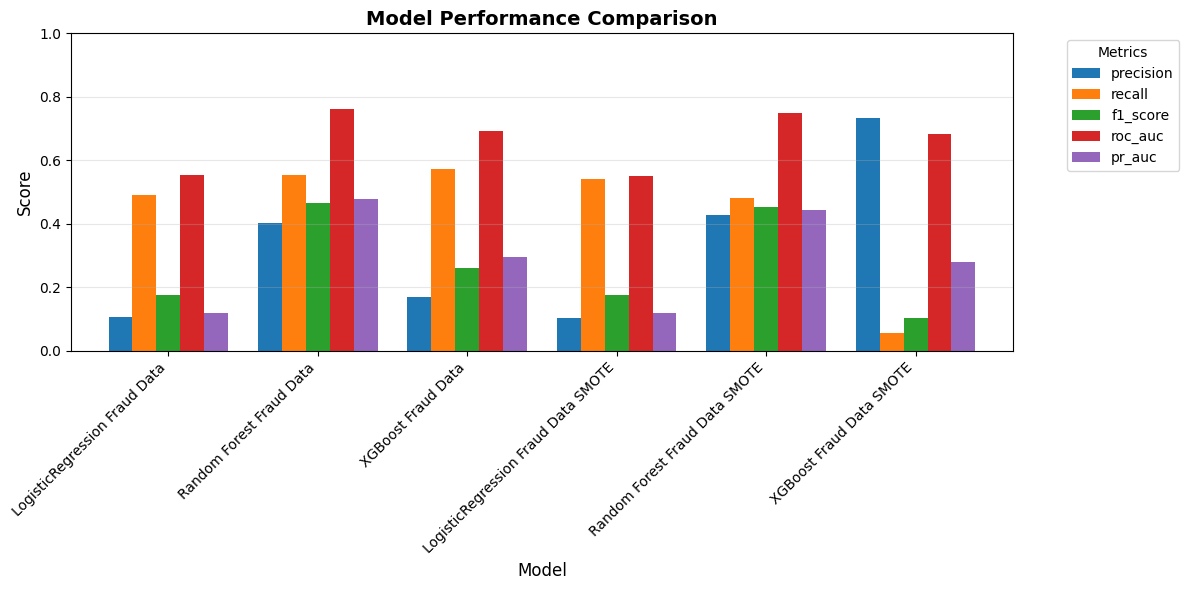

,accuracy,precision,recall,f1_score,roc_auc,pr_auc
LogisticRegression Fraud Data,0.571618,0.107899,0.491873,0.176975,0.552231,0.119487
Random Forest Fraud Data,0.880819,0.401026,0.552650,0.464785,0.761220,0.476837
XGBoost Fraud Data,0.696886,0.169123,0.571731,0.261031,0.693045,0.293927
LogisticRegression Fraud Data SMOTE,0.523145,0.104656,0.541696,0.175421,0.549267,0.118800
Random Forest Fraud Data SMOTE,0.891407,0.428841,0.481272,0.453546,0.750541,0.442469
XGBoost Fraud Data SMOTE,0.909638,0.732394,0.055124,0.102530,0.682192,0.278824


In [53]:
# Compare Fraud Data  Models

all_Fraud_Data_model_metrics = {
                            'LogisticRegression Fraud Data':Fraud_data_Model_metircs,
                           'Random Forest Fraud Data':Fraud_data_metircs_rand_forest,
                           'XGBoost Fraud Data':Fraud_data_Model_metircs_XGBoost,
                           'LogisticRegression Fraud Data SMOTE':Fraud_data_Model_metircs_SMOTE,
                           'Random Forest Fraud Data SMOTE':Fraud_data_Model_metircs_SMOTE_rand_forest,
                           'XGBoost Fraud Data SMOTE':Fraud_data_Model_metircs_SMOTE_XGBoost
                           }

md.compare_models(all_Fraud_Data_model_metrics)

In [77]:
# Dump Models

# 1. Map the desired Filename (Key) to the Model Object (Value)
models_to_dump = {
    'model_creditCard': model_creditCard,
    'model_creditCard_rand_forest': model_creditCard_rand_forest,
    'model_creditCard_Xgboost': model_creditCard_Xgboost,
    'model_creditCard_SMOTE': model_creditCard_SMOTE,
    'model_creditCard_rand_forest_SMOTE': model_creditCard_rand_forest_SMOTE,
    'model_creditCard_Xgboost_SMOTE': model_creditCard_Xgboost_SMOTE,
    'model_fraudData': model_fraudData,
    'model_fraudData_rand_forest': model_fraudData_rand_forest,
    'model_fraudData_XGBoost': model_fraudData_XGBoost,
    'model_fraudData_SMOTE': model_fraudData_SMOTE,
    'model_fraudData_rand_forest_SMOTE': model_fraudData_rand_forest_SMOTE,
    'model_fraudData_XGBoost_SMOTE': model_fraudData_XGBoost_SMOTE
}


for model_name, model_obj in models_to_dump.items():
    
    file_path = f'../models/{model_name}.pkl'
    
    # DEBUG CHECK: Ensure we are saving a model, not a dict
    if isinstance(model_obj, dict):
        if 'model' in model_obj:
            model_to_save = model_obj['model']
        else:
            print(f"❌ Error: {model_name} contains metrics, not a model object.")
            continue
    else:
        model_to_save = model_obj

    print(f"Saving {model_name} to {file_path}...")
    joblib.dump(model_to_save, file_path)

print(f"✓ Success! {len(models_to_dump)} individual models dumped.")

Saving model_creditCard to ../models/model_creditCard.pkl...
Saving model_creditCard_rand_forest to ../models/model_creditCard_rand_forest.pkl...
Saving model_creditCard_Xgboost to ../models/model_creditCard_Xgboost.pkl...
Saving model_creditCard_SMOTE to ../models/model_creditCard_SMOTE.pkl...
Saving model_creditCard_rand_forest_SMOTE to ../models/model_creditCard_rand_forest_SMOTE.pkl...
Saving model_creditCard_Xgboost_SMOTE to ../models/model_creditCard_Xgboost_SMOTE.pkl...
Saving model_fraudData to ../models/model_fraudData.pkl...
Saving model_fraudData_rand_forest to ../models/model_fraudData_rand_forest.pkl...
Saving model_fraudData_XGBoost to ../models/model_fraudData_XGBoost.pkl...
Saving model_fraudData_SMOTE to ../models/model_fraudData_SMOTE.pkl...
Saving model_fraudData_rand_forest_SMOTE to ../models/model_fraudData_rand_forest_SMOTE.pkl...
Saving model_fraudData_XGBoost_SMOTE to ../models/model_fraudData_XGBoost_SMOTE.pkl...
✓ Success! 12 individual models dumped.


In [66]:

def generate_fraud_analysis_report(all_metrics_dict):
    final_report = ""
    
    # Define the metric we want to use for "Best Model" selection
    primary_metric = 'f1_score'

    for dataset_label, models_metrics in all_metrics_dict.items():
        # 1. Create DataFrame
        df = pd.DataFrame(models_metrics).T
        
        # 2. Select the best model (using .idxmax() to find the index name)
        best_model_name = df[primary_metric].idxmax()
        best_metrics = df.loc[best_model_name]
        
        # 3. Dynamic Logic for Reasons
        is_smote = "SMOTE" in best_model_name.upper()
        is_ensemble = any(name in best_model_name.upper() for name in ["XGBOOST", "RANDOM FOREST"])
        
        reasons = f"it achieved the highest {primary_metric} of {best_metrics[primary_metric]:.4f}."
        if is_smote:
            reasons += " The SMOTE implementation effectively addressed the class imbalance, allowing for better identification of the minority fraud class."
        if is_ensemble:
            reasons += " The ensemble architecture allowed the model to capture complex, non-linear patterns in the fraud features more effectively than a single linear estimator."

        # 4. Generate the formatted metrics list
        # We capitalize the labels for the report to look professional
        metrics_list = "\n".join([f"            * {m.replace('_', ' ').title()}: {v:.4f}" for m, v in best_metrics.items()])
        
        # 5. Build the Summary Template
        summary = f"""
#### Conclusion

1. For {dataset_label} Analysis based on cases [0: Legitimate & 1: Fraud]

    * A variety of models were tested including:

        * Without Application of Class Imbalance Handling Methods
            * baseline models (Logistic Regression)
            * Ensemble Models (Random Forest & XGBOOST)

        * With Application of Class Imbalance Handling Methods (SMOTE)
            * baseline models (Logistic Regression)
            * Ensemble Models (Random Forest & XGBOOST)

    * From the {len(models_metrics)} models, the model which outperformed its counterparts was the **{best_model_name}**

        * Its Metrics were as follows:
{metrics_list}

    * **The key reasons are:** {reasons}
---
"""
        final_report += summary

    return final_report

# Execute the report generation
#report = generate_fraud_analysis_report(all_metrics_dict)
#print(report)

In [70]:
all_Fraud_Data_model_metrics = {
                            'LogisticRegression Fraud Data':Fraud_data_Model_metircs,
                           'Random Forest Fraud Data':Fraud_data_metircs_rand_forest,
                           'XGBoost Fraud Data':Fraud_data_Model_metircs_XGBoost,
                           'LogisticRegression Fraud Data SMOTE':Fraud_data_Model_metircs_SMOTE,
                           'Random Forest Fraud Data SMOTE':Fraud_data_Model_metircs_SMOTE_rand_forest,
                           'XGBoost Fraud Data SMOTE':Fraud_data_Model_metircs_SMOTE_XGBoost
                           }
all_credit_card_model_metrics = {
                            'LogisticRegression Credit Card Data':Credit_card_Model_metircs,
                           'Random Forest Credit Card Data':Credit_card_Model_metircs_rand_forest,
                           'XGBoost Credit Card Data':Credit_card_Model_metircs_XGBoost,
                            'LogisticRegression Credit Card Data SMOTE':Credit_card_Model_metircs_SMOTE,
                           'Random Forest Credit Card Data SMOTE':Credit_card_Model_metircs_SMOTE_rand_forest,
                           'XGBoost Credit Card Data SMOTE':Credit_card_Model_metircs_SMOTE_XGBoost
                           }

all_metrics_dict = {
                    'Fraud Data' : all_Fraud_Data_model_metrics,
                    'Credit Card Data' :all_credit_card_model_metrics
                }

In [71]:
# Generate Conculsion / Summary
summary_report = generate_fraud_analysis_report(all_metrics_dict)
print(summary_report)


#### Conclusion

1. For Fraud Data Analysis based on cases [0: Legitimate & 1: Fraud]

    * A variety of models were tested including:

        * Without Application of Class Imbalance Handling Methods
            * baseline models (Logistic Regression)
            * Ensemble Models (Random Forest & XGBOOST)

        * With Application of Class Imbalance Handling Methods (SMOTE)
            * baseline models (Logistic Regression)
            * Ensemble Models (Random Forest & XGBOOST)

    * From the 6 models, the model which outperformed its counterparts was the **Random Forest Fraud Data**

        * Its Metrics were as follows:
            * Accuracy: 0.8808
            * Precision: 0.4010
            * Recall: 0.5527
            * F1 Score: 0.4648
            * Roc Auc: 0.7612
            * Pr Auc: 0.4768

    * **The key reasons are:** it achieved the highest f1_score of 0.4648. The ensemble architecture allowed the model to capture complex, non-linear patterns in the fraud feat